Indices of points on the convex hull (PC):
[1, 2, 3, 5, 6, 8]
Indices of points inside the convex hull (PI):
[0, 4, 7, 9]
[6 3 1 5 2 8]


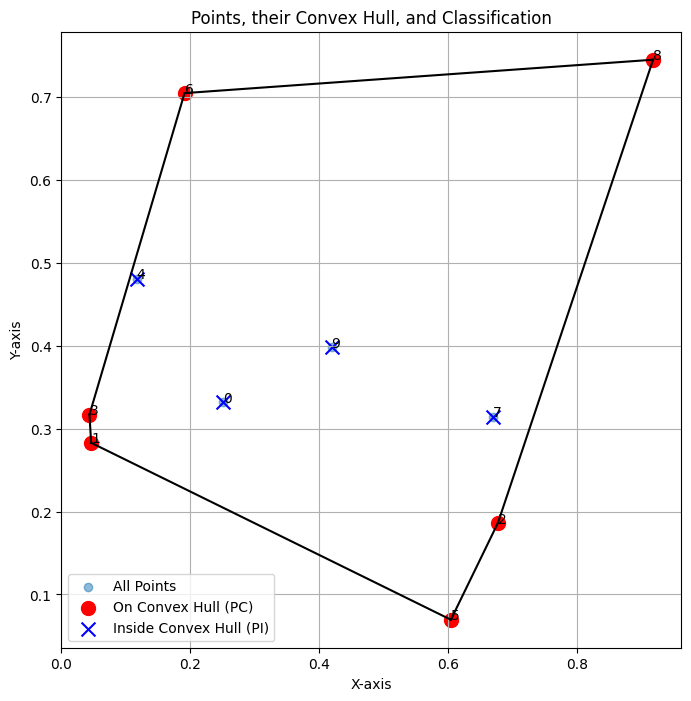

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import ConvexHull

# Step 1. Generate a set of 10 points and their convex hull.
# Classify points inside and on the convex hull.
# Visualize the results.


def generate_points(num_points=10, seed=41):
    """
    Generates random points in 2D space.

    Args:
        num_points (int): The number of points to generate.
        seed (int): The seed for the random number generator.

    Returns:
        tuple: A tuple containing:
            - points (np.ndarray): Array of shape (num_points, 2) representing the generated points.
            - x (np.ndarray): Array of x-coordinates.
            - y (np.ndarray): Array of y-coordinates.
    """
    np.random.seed(seed)
    x = np.random.rand(num_points)
    y = np.random.rand(num_points)
    points = np.vstack((x, y)).T
    return points, x, y

def classify_points(points):
    """
    Computes the convex hull and classifies points as inside or on the hull.

    Args:
        points (np.ndarray): Array of shape (num_points, 2) representing the points.

    Returns:
        tuple: A tuple containing:
            - hull (ConvexHull): The ConvexHull object.
            - hull_indices (np.ndarray): Indices of points on the convex hull.
            - pc_indices (list): Indices of points on the convex hull (PC).
            - pi_indices (list): Indices of points inside the convex hull (PI).
    """
    hull = ConvexHull(points)
    hull_indices = hull.vertices

    pc_indices = [] # Points on Convex Hull
    pi_indices = [] # Points Inside Convex Hull

    for i in range(len(points)):
        if i in hull_indices:
            pc_indices.append(i)
        else:
            pi_indices.append(i)

    return hull, hull_indices, pc_indices, pi_indices

def visualize_points_and_hull(x, y, points, hull, pc_indices, pi_indices):
    """
    Visualizes the points, convex hull, and classified points.

    Args:
        x (np.ndarray): Array of x-coordinates.
        y (np.ndarray): Array of y-coordinates.
        points (np.ndarray): Array of shape (num_points, 2) representing the points.
        hull (ConvexHull): The ConvexHull object.
        pc_indices (list): Indices of points on the convex hull (PC).
        pi_indices (list): Indices of points inside the convex hull (PI).
    """
    plt.figure(figsize=(8, 8))

    # Scatter plot of all points, points on hull, and points inside
    plt.scatter(x, y, label='All Points', alpha=0.5)
    plt.scatter(x[pc_indices], y[pc_indices], color='red', label='On Convex Hull (PC)', marker='o', s=100)
    # Corrected indexing for y-coordinates and removed duplicate scatter call
    plt.scatter(x[pi_indices], y[pi_indices], color='blue', label='Inside Convex Hull (PI)', marker='x', s=100)


    # Plot the convex hull edges
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

    # Annotate points with their indices
    for i in range(len(x)):
        plt.text(x[i], y[i], str(i))

    plt.title("Points, their Convex Hull, and Classification")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.legend()
    plt.grid(True)
    plt.show()

# Main execution for Step 1 - Moved out of if __name__ == '__main__':
# Generate 10 random points in 2D space
points, x, y = generate_points(num_points=10, seed=41)

# Generate the initial convex hull. Classify points inside and on the convex hull.
hull, hull_indices, pc_indices, pi_indices = classify_points(points)

# Display the categorized indices
print("Indices of points on the convex hull (PC):")
print(pc_indices)
print("Indices of points inside the convex hull (PI):")
print(pi_indices)

print(hull_indices)

# Visualize the results
visualize_points_and_hull(x, y, points, hull, pc_indices, pi_indices)

Number of triangles: 12
Triangle indices (first 5): [0 1 2 3 4]
Calculated triangle sizes:
[0.1160279  0.06416614 0.03369004 0.03559517 0.00355458 0.02279461
 0.01568567 0.0177679  0.03692618 0.01693299 0.00205235 0.01646467]


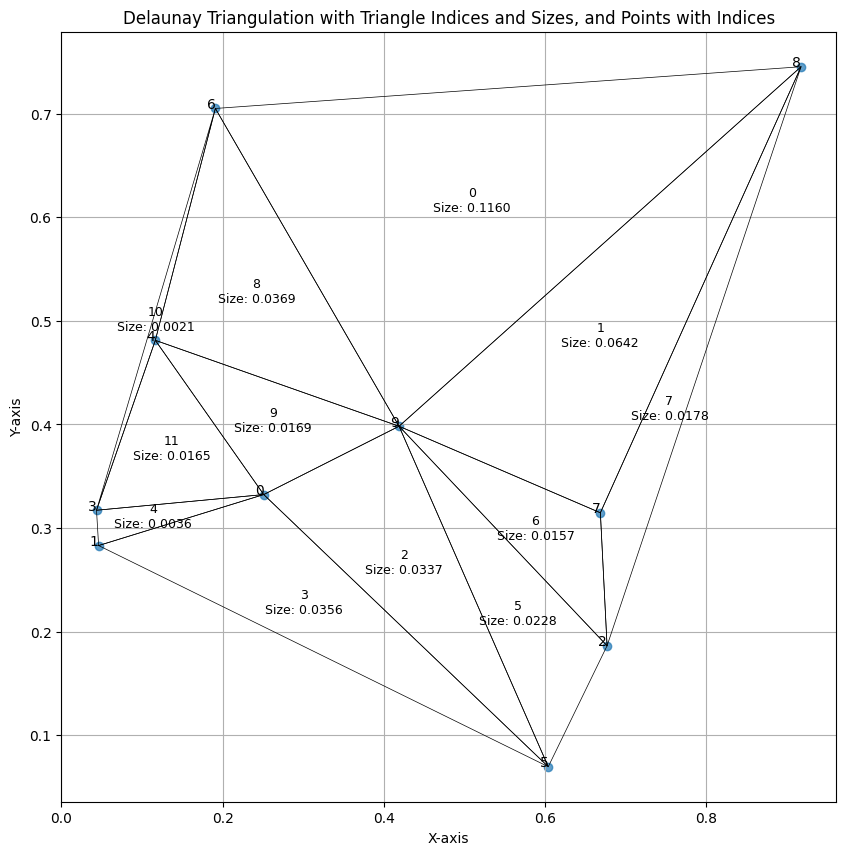

Indices of Type I triangles (edge on convex hull):
[0, 3, 4, 5, 7, 10]
Indices of Type II triangles (no edge on convex hull):
[1, 2, 6, 8, 9, 11]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import Delaunay, ConvexHull

# Step 2. Triangulate the convex hull, calculate the triangles' sizes and classify them.


def triangulate_points(points):
    """Performs Delaunay triangulation on the given points."""
    tri = Delaunay(points)
    triangles = tri.simplices
    return tri, triangles

def calculate_triangle_sizes(points, triangles):
    """Calculates the area of each triangle in the triangulation."""
    triangle_areas = []
    for triangle_indices in triangles:
        p1, p2, p3 = points[triangle_indices]
        # Calculate area using the Shoelace formula
        area = 0.5 * abs(p1[0]*(p2[1] - p3[1]) + p2[0]*(p3[1] - p1[1]) + p3[0]*(p1[1] - p2[1]))
        triangle_areas.append(area)
    return np.array(triangle_areas)

def visualize_triangulation(x, y, points, triangles, triangle_sizes):
    """Visualizes the Delaunay triangulation with triangle indices and sizes."""
    plt.figure(figsize=(10, 10))

    # Plot the original points and their indices
    plt.scatter(x, y, label='Original Points', alpha=0.7)
    for i in range(len(x)):
        plt.text(x[i], y[i], str(i), fontsize=10, ha='right')

    # Plot triangle edges and annotate with indices and sizes
    for i, (simplex, area) in enumerate(zip(triangles, triangle_sizes)):
        triangle_points = points[simplex]
        centroid_x, centroid_y = np.mean(triangle_points[:, 0]), np.mean(triangle_points[:, 1])
        plt.plot(triangle_points[[0, 1, 2, 0], 0], triangle_points[[0, 1, 2, 0], 1], 'k-', linewidth=0.5)
        annotation_text = f'{i}\nSize: {area:.4f}'
        plt.text(centroid_x, centroid_y, annotation_text, fontsize=9, ha='center', va='center')

    plt.title("Delaunay Triangulation with Triangle Indices and Sizes, and Points with Indices")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.grid(True)
    plt.show()

def classify_triangles_by_hull_edge(triangles, hull_indices):
    """Classifies triangles as Type I or Type II based on whether they have an edge on the convex hull."""
    type_i_indices = []
    type_ii_indices = []

    # Create a set of hull edges for efficient lookup
    hull_edges = set()
    # Assuming hull.simplices gives pairs of indices for edges on the hull for 2D
    # For ConvexHull in 2D, hull.simplices gives the indices of the vertices forming the hull edges
    for i in range(len(hull_indices)):
        edge = tuple(sorted((hull_indices[i], hull_indices[(i + 1) % len(hull_indices)])))
        hull_edges.add(edge)

    for i, simplex in enumerate(triangles):
        is_type_i = False
        # Check each edge of the triangle
        for j in range(3):
            v1_index = simplex[j]
            v2_index = simplex[(j + 1) % 3]
            triangle_edge = tuple(sorted((v1_index, v2_index)))

            # Check if this triangle edge is one of the hull edges
            if triangle_edge in hull_edges:
                 is_type_i = True
                 break # Found a hull edge, so it's a Type I triangle

        if is_type_i:
            type_i_indices.append(i)
        else:
            type_ii_indices.append(i)

    return type_i_indices, type_ii_indices


# Main execution for Step 2 - Moved out of if __name__ == '__main__':
# Triangulate the convex hull using Delaunay triangulation
tri, triangles = triangulate_points(points)
num_triangles = triangles.shape[0]

print("Number of triangles:", num_triangles)
print("Triangle indices (first 5):", np.arange(num_triangles)[:5])

# Calculate the triangles' sizes
triangle_sizes = calculate_triangle_sizes(points, triangles)

print("Calculated triangle sizes:")
print(triangle_sizes)

# Visualize triangles with indices and sizes and points with indices
visualize_triangulation(x, y, points, triangles, triangle_sizes)


# Classify the triangles (Type I and Type II)
# Ensure hull_indices is available from Step 1
# hull_indices is defined in cell 7de532c5 when it's executed.
# If cell 7de52c5 is run before this cell, hull_indices will be available in the global scope.
# The NameError indicates that it is not available.
# Running cells sequentially is the standard way to handle dependencies in notebooks.


type_i_indices, type_ii_indices = classify_triangles_by_hull_edge(triangles, hull_indices)


print("Indices of Type I triangles (edge on convex hull):")
print(type_i_indices)
print("Indices of Type II triangles (no edge on convex hull):")
print(type_ii_indices)

# Variables defined in this cell for use in later steps:
# tri, triangles, num_triangles, triangle_sizes, type_i_indices, type_ii_indices
# These will be available globally if this cell is executed after its dependencies.

In [ ]:
import numpy as np
from scipy.spatial import ConvexHull
from scipy.spatial import Delaunay # Although Delaunay is used in Step 2, importing here for clarity if needed in Step 3 functions

# Step 3. Preparation for QUBO formulation.


# Function to calculate the angle between three points (vertex_b to vertex_a and vertex_b to vertex_c)
def calculate_angle(p_a, p_b, p_c):
    """
    Calculates the angle (in degrees) at point p_b between vectors p_b->p_a and p_b->p_c.

    Args:
        p_a (np.ndarray): Coordinates of point A.
        p_b (np.ndarray): Coordinates of point B (the vertex where the angle is calculated).
        p_c (np.ndarray): Coordinates of point C.

    Returns:
        float: The angle in degrees. Returns 0 if either vector has zero norm.
    """
    vec_ba = p_a - p_b
    vec_bc = p_c - p_b
    dot_product = np.dot(vec_ba, vec_bc)
    norm_ba = np.linalg.norm(vec_ba)
    norm_bc = np.linalg.norm(vec_bc)
    if norm_ba == 0 or norm_bc == 0:
        return 0 # Avoid division by zero
    cosine_angle = dot_product / (norm_ba * norm_bc)
    # Clamp the value to the range [-1, 1] to avoid issues with floating point inaccuracies
    cosine_angle = np.clip(cosine_angle, -1.0, 1.0)
    angle_in_radians = np.arccos(cosine_angle)
    angle_in_degrees = np.degrees(angle_in_radians)
    return angle_in_degrees

def create_matrix_A(triangles, points, num_triangles):
    """
    Creates matrix A where A[i, j] = 1 if triangle i and triangle j share an edge
    and the sum of angles at a shared vertex formed by the non-shared vertices
    and the shared vertex is less than 180 degrees.

    Args:
        triangles (np.ndarray): Array of shape (num_triangles, 3) with vertex indices for each triangle.
        points (np.ndarray): Array of shape (num_points, 2) with point coordinates.
        num_triangles (int): The total number of triangles.

    Returns:
        np.ndarray: The matrix A of shape (num_triangles, num_triangles).
    """
    A = np.zeros((num_triangles, num_triangles))

    for i in range(num_triangles):
        for j in range(num_triangles):
            if i == j:
                continue

            tri1_vertices_indices = triangles[i]
            tri2_vertices_indices = triangles[j]

            shared_vertices = list(set(tri1_vertices_indices) & set(tri2_vertices_indices))

            if len(shared_vertices) == 2:
                # Triangles i and j share an edge
                shared_vertex_1_idx, shared_vertex_2_idx = shared_vertices

                # Find the non-shared vertex for each triangle
                non_shared_tri1_idx = list(set(tri1_vertices_indices) - set(shared_vertices))[0]
                non_shared_tri2_idx = list(set(tri2_vertices_indices) - set(shared_vertices))[0]

                # Get the points for the vertices
                p_v1_shared = points[shared_vertex_1_idx]
                p_v2_shared = points[shared_vertex_2_idx]
                p_non_shared_tri1 = points[non_shared_tri1_idx]
                p_non_shared_tri2 = points[non_shared_tri2_idx]

                # Check the angle condition at one of the shared vertices.
                # The condition is that the sum of the angles formed by the shared edge
                # and the edges to the non-shared vertices at *one* shared vertex is < 180.
                # Let's check this at shared_vertex_1_idx.
                # Angle 1: shared_vertex_1_idx -> shared_vertex_2_idx and shared_vertex_1_idx -> non_shared_tri1_idx
                angle1_at_v1 = calculate_angle(p_v2_shared, p_v1_shared, p_non_shared_tri1)
                # Angle 2: shared_vertex_1_idx -> shared_vertex_2_idx and shared_vertex_1_idx -> non_shared_tri2_idx
                angle2_at_v1 = calculate_angle(p_v2_shared, p_v1_shared, p_non_shared_tri2)

                # Check the sum of angles at shared_vertex_1_idx
                if angle1_at_v1 + angle2_at_v1 < 180:
                    A[i, j] = 1

                # Optionally, check the condition at the other shared vertex as well if the definition implies
                # the condition must hold at *either* shared vertex. The original prompt's wording
                # ("the angle abd + the angle abc < 180 degree") implies checking at one specific vertex ('b').
                # The current implementation checks at the first shared vertex found.
                # To be more robust, we could check at both:
                # angle1_at_v2 = calculate_angle(p_v1_shared, p_v2_shared, p_non_shared_tri1)
                # angle2_at_v2 = calculate_angle(p_v1_shared, p_v2_shared, p_non_shared_tri2)
                # if angle1_at_v1 + angle2_at_v2 < 180 or angle1_at_v2 + angle2_at_v2 < 180:
                #     A[i, j] = 1
                # Sticking to the interpretation of checking at one vertex based on the prompt's notation.


    return A

def create_matrix_B(triangles, points, num_triangles, type_i_indices):
    """
    Creates matrix B where B[i, j] = 1 if triangle i and triangle j share a vertex,
    the shared vertex is outside the convex hull of the other four vertices,
    and the two triangles are not both Type I.

    Args:
        triangles (np.ndarray): Array of shape (num_triangles, 3) with vertex indices for each triangle.
        points (np.ndarray): Array of shape (num_points, 2) with point coordinates.
        num_triangles (int): The total number of triangles.
        type_i_indices (list): List of indices of Type I triangles.

    Returns:
        np.ndarray: The matrix B of shape (num_triangles, num_triangles).
    """
    B = np.zeros((num_triangles, num_triangles))

    # Convert type_i_indices to a set for efficient lookup
    type_i_set = set(type_i_indices)

    for i in range(num_triangles):
        for j in range(num_triangles):
            if i == j:
                continue

            tri1_vertices_indices = triangles[i]
            tri2_vertices_indices = triangles[j]

            shared_vertices = list(set(tri1_vertices_indices) & set(tri2_vertices_indices))

            # Check if they share exactly one vertex
            if len(shared_vertices) == 1:
                shared_vertex_index = shared_vertices[0]

                non_shared_tri1 = list(set(tri1_vertices_indices) - set(shared_vertices))
                non_shared_tri2 = list(set(tri2_vertices_indices) - set(shared_vertices))

                other_four_vertices_indices = non_shared_tri1 + non_shared_tri2

                # Ensure there are exactly 4 other vertices
                if len(other_four_vertices_indices) == 4:

                    shared_vertex_point = points[shared_vertex_index]
                    other_four_points = points[other_four_vertices_indices]

                    try:
                        # Compute the convex hull of the other four points
                        hull_four_points = ConvexHull(other_four_points)

                        # Check if the shared vertex is outside the convex hull of the other four points.
                        # A point is outside the convex hull if adding it expands the hull.
                        # We can check if the index corresponding to the shared vertex point
                        # in a combined set of points is part of the convex hull of the combined set.

                        # To do this robustly, we can check if the shared vertex lies within the
                        # region defined by the convex hull of the other four points.
                        # Scipy's Delaunay triangulation can be used for point-in-hull testing.
                        # If the shared vertex is *not* in the Delaunay triangulation of the other four points,
                        # it's outside their convex hull (assuming the other four points form a non-degenerate hull).

                        # Check if the shared vertex is *not* in the convex hull of the other four points.
                        # This can be done by checking if the point is outside the Delaunay triangulation
                        # of the other four points.
                        tri_four_points = Delaunay(other_four_points)
                        # If the point is outside the triangulation, its index will not be returned by find_simplex
                        # or find_simplex will return -1.
                        if tri_four_points.find_simplex(shared_vertex_point) == -1:
                             # The shared vertex is outside the convex hull of the other four points.

                             # Check if both triangles are not Type I
                             if not (i in type_i_set and j in type_i_set):
                                  B[i, j] = 1

                    except Exception as e:
                         # If ConvexHull or Delaunay fails (e.g., points are collinear or all same), skip this pair.
                         # print(f"Could not compute hull/triangulation for triangles {i}, {j}: {e}")
                         continue
                # else:
                    # print(f"Warning: Triangles {i} and {j} share 1 vertex but do not have exactly 4 other vertices.")


    return B


# Main execution for Step 3 - Moved out of if __name__ == '__main__':
# Ensure 'triangles', 'points', and 'type_i_indices' are available from previous steps

# Create matrix A
A = create_matrix_A(triangles, points, num_triangles)

print("Matrix A:")
print(A)

# Get the dimensions of matrix A
rows_a, cols_a = A.shape
print("Shape of matrix A:", A.shape)

print("Triangle pairs (i, j) where A[i, j] == 1:")
# Using a list comprehension for cleaner output
a_pairs = [(i, j) for i in range(rows_a) for j in range(cols_a) if A[i, j] == 1]
print(a_pairs)


# Create matrix B
B = create_matrix_B(triangles, points, num_triangles, type_i_indices)

print("\nMatrix B:")
print(B)

# Get the dimensions of matrix B
rows_b, cols_b = B.shape
print("Shape of matrix B:", B.shape)

print("Triangle pairs (i, j) where B[i, j] == 1:")
# Using a list comprehension for cleaner output
b_pairs = [(i, j) for i in range(rows_b) for j in range(cols_b) if B[i, j] == 1]
print(b_pairs)

Matrix A:
[[0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0.]]
Shape of matrix A: (12, 12)
Triangle pairs (i, j) where A[i, j] == 1:
[(0, 1), (0, 8), (1, 0), (1, 6), (1, 7), (2, 5), (2, 9), (3, 4), (4, 3), (4, 11), (5, 2), (5, 6), (6, 1), (6, 5), (6, 7), (7, 1), (7, 6), (8, 0), (8, 9), (9, 2), (9, 8), (9, 11), (10, 11), (11, 4), (11, 9), (11, 10)]

Matrix B:
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
import numpy as np

# Step 4. Generate QUBO formulation. Add penalty for convexity.


def initialize_qubo_matrix(num_triangles, triangle_sizes):
    """Initializes the QUBO matrix based on the objective function."""
    Q = np.zeros((num_triangles, num_triangles))
    # Objective: Minimize sum(-size_i * x_i)
    for i in range(num_triangles):
        Q[i, i] = -triangle_sizes[i]
    return Q

def add_penalty_1(Q, A, triangle_sizes, num_triangles):
    """Adds Penalty 1 to the QUBO matrix Q."""
    # Penalty 1: for any two triangles i and j sharing an edge, if both are black and the entry A[i, j] = 1, then add penalty which is their total size
    # This corresponds to a term of the form penalty * x_i * x_j
    # The penalty is triangle_sizes[i] + triangle_sizes[j]
    # Add this penalty to the off-diagonal elements Q[i, j] and Q[j, i]
    for i in range(num_triangles):
        for j in range(i + 1, num_triangles): # Iterate through unique pairs (i, j) with j > i
            if A[i, j] == 1 or A[j, i] == 1: # Check if either A[i,j] or A[j,i] is 1 since A is not necessarily symmetric for angle condition
                penalty = triangle_sizes[i] + triangle_sizes[j]
                Q[i, j] += penalty
                Q[j, i] += penalty # Add to both for symmetric matrix representation
    return Q

def add_penalty_2(Q, B, triangle_sizes, num_triangles):
    """Adds Penalty 2 to the QUBO matrix Q."""
    # Penalty 2: for each pair of triangles i and j, add their total size as penalty if B[i, j] = 1 and both are black.
    # This corresponds to a term of the form penalty * x_i * x_j
    # The penalty is triangle_sizes[i] + triangle_sizes[j]
    # Add this penalty to the off-diagonal elements Q[i, j] and Q[j, i]
    for i in range(num_triangles):
        for j in range(i + 1, num_triangles): # Iterate through unique pairs (i, j) with j > i
            if B[i, j] == 1 or B[j, i] == 1: # Check if either B[i,j] or B[j,i] is 1
                penalty = triangle_sizes[i] + triangle_sizes[j]
                Q[i, j] += penalty
                Q[j, i] += penalty # Add to both for symmetric matrix representation
    return Q

# Main execution for Step 4
if __name__ == '__main__':
    # Ensure 'num_triangles', 'triangle_sizes', 'A', and 'B' are available from previous steps

    # Initialize the QUBO matrix based on the objective function
    Q = initialize_qubo_matrix(num_triangles, triangle_sizes)
    print("Initial Q matrix (objective function):")
    print(Q)

    # Add Penalty 1 to the QUBO matrix
    Q = add_penalty_1(Q, A, triangle_sizes, num_triangles)
    print("\nQ matrix after adding Penalty 1:")
    print(Q)

    # Add Penalty 2 to the QUBO matrix
    Q = add_penalty_2(Q, B, triangle_sizes, num_triangles)
    print("\nQ matrix after adding Penalty 2:")
    print(Q)

Initial Q matrix (objective function):
[[-0.1160279   0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.         -0.06416614  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.         -0.03369004  0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.         -0.03559517  0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         -0.00355458  0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.         -0.02279461
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
  -0.01568567  0.          0.          0.

In [ ]:
!pip install dimod

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 39.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
from scipy.spatial import ConvexHull, Delaunay # Importing Delaunay here for clarity if needed in Step 5 functions
import dimod

# Step 5. Generate QUBO formulation. Add penalty for continuity.


def identify_type_i_neighbors(triangles, type_i_indices, num_triangles):
    """
    Identifies triangles that share an edge with Type I triangles.

    Args:
        triangles (np.ndarray): Array of shape (num_triangles, 3) with vertex indices for each triangle.
        type_i_indices (list): List of indices of Type I triangles.
        num_triangles (int): The total number of triangles.

    Returns:
        dict: A dictionary where keys are Type I triangle indices and values are lists
              of indices of their edge-sharing neighbors.
    """
    type_i_neighbors = {}

    for l in type_i_indices:
        neighbors_of_l = []
        for j in range(num_triangles):
            if l == j:
                continue

            tri1_vertices_indices = triangles[l]
            tri2_vertices_indices = triangles[j]
            shared_vertices = list(set(tri1_vertices_indices) & set(tri2_vertices_indices))

            if len(shared_vertices) == 2:
                neighbors_of_l.append(j)

        # Note: In this specific Delaunay triangulation context, Type I triangles
        # sharing an edge with the convex hull are expected to have exactly two
        # edge-sharing neighbors within the triangulation.
        if len(neighbors_of_l) == 2:
            type_i_neighbors[l] = neighbors_of_l
        # else:
            # print(f"Warning: Triangle {l} (Type I) has {len(neighbors_of_l)} edge-sharing neighbors: {neighbors_of_l}")

    return type_i_neighbors

def expand_qubo_matrix_with_type_i_supp_vars(Q, num_triangles, num_type_i_supp_vars):
    """
    Adds columns/rows to the QUBO matrix for supplementary variables for Type I penalty.

    Args:
        Q (np.ndarray): The initial QUBO matrix (e.g., with objective and other penalties).
        num_triangles (int): The original number of triangle variables.
        num_type_i_supp_vars (int): The number of supplementary variables needed for Type I penalty.

    Returns:
        np.ndarray: The expanded QUBO matrix.
        int: The total number of variables in the expanded QUBO.
        list: Indices of the supplementary variables.
        dict: Mapping from Type I triangle index to supplementary variable index.
    """
    total_variables = num_triangles + num_type_i_supp_vars
    Q_expanded = np.zeros((total_variables, total_variables))
    Q_expanded[:num_triangles, :num_triangles] = Q # Copy the initial Q matrix

    supplementary_variable_indices = list(range(num_triangles, total_variables))
    type_i_to_supplementary_index = {type_i_indices[i]: supplementary_variable_indices[i] for i in range(num_type_i_supp_vars)}

    return Q_expanded, total_variables, supplementary_variable_indices, type_i_to_supplementary_index

def add_type_i_continuity_penalty(Q_expanded, type_i_indices, type_i_neighbors, triangle_sizes, type_i_to_supplementary_index):
    """
    Adds the Type I continuity penalty to the expanded QUBO matrix.

    Args:
        Q_expanded (np.ndarray): The expanded QUBO matrix.
        type_i_indices (list): List of indices of Type I triangles.
        type_i_neighbors (dict): Dictionary of Type I triangle neighbors.
        triangle_sizes (np.ndarray): Array of triangle sizes.
        type_i_to_supplementary_index (dict): Mapping from Type I triangle index to supplementary variable index.

    Returns:
        np.ndarray: The updated expanded QUBO matrix.
    """
    for l in type_i_indices:
        if l in type_i_neighbors:
            neighbors = type_i_neighbors[l]
            if len(neighbors) == 2:
                a, b = neighbors
                u_l_index = type_i_to_supplementary_index[l]

                # Add contributions to Q_expanded based on the formula multiplied by triangle_sizes[l]
                # penalty = triangle_sizes[l] * (x_l - x_l x_a - x_l x_b + 2 x_l u_l) + (x_a x_b - 2x_a u_l - 2x_b u_l + 3u_l)

                # From triangle_sizes[l] * (x_l - x_l x_a - x_l x_b + 2 x_l u_l):
                Q_expanded[l, l] += triangle_sizes[l]
                Q_expanded[l, a] -= triangle_sizes[l] / 2
                Q_expanded[a, l] -= triangle_sizes[l] / 2
                Q_expanded[l, b] -= triangle_sizes[l] / 2
                Q_expanded[b, l] -= triangle_sizes[l] / 2
                Q_expanded[l, u_l_index] += triangle_sizes[l]
                Q_expanded[u_l_index, l] += triangle_sizes[l]

                # From (x_a x_b - 2x_a u_l - 2x_b u_l + 3u_l):
                Q_expanded[a, b] += 1 / 2
                Q_expanded[b, a] += 1 / 2
                Q_expanded[a, u_l_index] -= 1
                Q_expanded[u_l_index, a] -= 1
                Q_expanded[b, u_l_index] -= 1
                Q_expanded[u_l_index, b] -= 1
                Q_expanded[u_l_index, u_l_index] += 3

    return Q_expanded

# Main execution for Step 5
if __name__ == '__main__':
    # Ensure 'Q', 'num_triangles', 'triangle_sizes', 'triangles', 'type_i_indices', 'points'
    # are available from previous steps

    # Identify neighbors for each Type I triangle
    type_i_neighbors = identify_type_i_neighbors(triangles, type_i_indices, num_triangles)
    print("Neighbors for each Type I triangle (sharing an edge):")
    for tri_index, neighbors in type_i_neighbors.items():
        print(f"Triangle {tri_index}: Neighbors {neighbors}")

    # Determine supplementary variables needed and expand the QUBO matrix
    num_supplementary_variables = len(type_i_indices)
    Q_expanded, total_variables, supplementary_variable_indices, type_i_to_supplementary_index = \
        expand_qubo_matrix_with_type_i_supp_vars(Q, num_triangles, num_supplementary_variables)

    print(f"\nNumber of supplementary variables needed: {num_supplementary_variables}")
    print(f"Total number of variables in the expanded QUBO: {total_variables}")
    print(f"Indices of supplementary variables: {supplementary_variable_indices}")
    print("\nMapping from Type I triangle index to supplementary variable index:")
    print(type_i_to_supplementary_index)
    print("Shape of the expanded QUBO matrix Q_expanded:", Q_expanded.shape)
    print("\nTop-left corner of Q_expanded (original Q matrix with Penalty 1 and 2):")
    print(Q_expanded[:num_triangles, :num_triangles])


    # Add Type I continuity penalty to the expanded QUBO matrix
    Q_expanded = add_type_i_continuity_penalty(
        Q_expanded, type_i_indices, type_i_neighbors, triangle_sizes, type_i_to_supplementary_index
    )

    # Print the updated Q_expanded matrix to verify the added penalty terms.
    print("\nUpdated Q_expanded matrix after adding Type I penalty terms:")
    print(Q_expanded)

Neighbors for each Type I triangle (sharing an edge):
Triangle 0: Neighbors [1, 8]
Triangle 3: Neighbors [2, 4]
Triangle 4: Neighbors [3, 11]
Triangle 5: Neighbors [2, 6]
Triangle 7: Neighbors [1, 6]
Triangle 10: Neighbors [8, 11]

Number of supplementary variables needed: 6
Total number of variables in the expanded QUBO: 18
Indices of supplementary variables: [12, 13, 14, 15, 16, 17]

Mapping from Type I triangle index to supplementary variable index:
{0: 12, 3: 13, 4: 14, 5: 15, 7: 16, 10: 17}
Shape of the expanded QUBO matrix Q_expanded: (18, 18)

Top-left corner of Q_expanded (original Q matrix with Penalty 1 and 2):
[[-0.1160279   0.18019404  0.          0.          0.          0.
   0.13171356  0.          0.15295407  0.13296089  0.          0.        ]
 [ 0.18019404 -0.06416614  0.          0.          0.          0.08696075
   0.0798518   0.08193404  0.          0.          0.          0.        ]
 [ 0.          0.         -0.03369004  0.          0.          0.05648464
   0.04

In [ ]:
####################################
#
# Step 6. Generate QUBO formulation. Add penalty for continuity.
#
####################################

# Objective: Maximize the total size of black triangles.
# Let x_i = 1 if triangle i is black, x_i = 0 if triangle i is red.
# Maximize sum(size_i * x_i) for all triangles i.
# This is equivalent to minimizing sum(-size_i * x_i).

# The linear part of the QUBO (diagonal elements of the Q matrix)
# corresponds to the coefficients of the x_i terms in the objective function.
# Q_ii = -triangle_sizes[i]

# Initialize the Q matrix (upper triangle of the QUBO matrix)
Q = np.zeros((num_triangles, num_triangles))

# Populate the diagonal elements of Q based on the objective function
for i in range(num_triangles):
    Q[i, i] = -triangle_sizes[i]

print("Initial Q matrix (objective function):")
print(Q)

# Penalty 1: for any two triangles i and j sharing an edge, if both are black and the entry A[i, j] = 1, then add penalty which is their total size
# This corresponds to a term of the form penalty * x_i * x_j
# The penalty is triangle_sizes[i] + triangle_sizes[j]
# Add this penalty to the off-diagonal elements Q[i, j] and Q[j, i]

for i in range(num_triangles):
    for j in range(i + 1, num_triangles): # Iterate through unique pairs (i, j) with j > i
        if A[i, j] == 1 or A[j, i] == 1: # Check if either A[i,j] or A[j,i] is 1 since A is not necessarily symmetric for angle condition
            penalty = triangle_sizes[i] + triangle_sizes[j]
            Q[i, j] += penalty
            Q[j, i] += penalty # Add to both for symmetric matrix representation

print("\nQ matrix after adding Penalty 1:")
print(Q)

# Penalty 2: for each pair of triangles i and j, add their total size as penalty if B[i, j] = 1 and both are black.
# This corresponds to a term of the form penalty * x_i * x_j
# The penalty is triangle_sizes[i] + triangle_sizes[j]
# Add this penalty to the off-diagonal elements Q[i, j] and Q[j, i]

for i in range(num_triangles):
    for j in range(i + 1, num_triangles): # Iterate through unique pairs (i, j) with j > i
        if B[i, j] == 1 or B[j, i] == 1: # Check if either B[i,j] or B[j,i] is 1
            penalty = triangle_sizes[i] + triangle_sizes[j]
            Q[i, j] += penalty
            Q[j, i] += penalty # Add to both for symmetric matrix representation

print("\nQ matrix after adding Penalty 2:")
print(Q)

# Initialize a dictionary to store the neighbors for each Type I triangle.
type_i_neighbors = {}

# Iterate through the indices of the Type I triangles.
for l in type_i_indices:
    neighbors_of_l = []
    # Iterate through all other triangles j.
    for j in range(num_triangles):
        if l == j:
            continue # Skip self-comparison

        # Check if triangle l and triangle j share an edge using the A matrix.
        # Note: A[i, j] == 1 or A[j, i] == 1 if triangles i and j share an edge
        # and the angle condition is met. Since Type I triangles' edge on the hull
        # satisfies the angle condition with no other triangle within the hull,
        # we can simply check for shared edges.
        # A simpler approach is to check if the number of shared vertices is 2.
        tri1_vertices_indices = triangles[l]
        tri2_vertices_indices = triangles[j]
        shared_vertices = list(set(tri1_vertices_indices) & set(tri2_vertices_indices))

        if len(shared_vertices) == 2:
            neighbors_of_l.append(j)

    # Since each Type I triangle shares an edge with exactly two other triangles
    # in this Delaunay triangulation of points including the convex hull vertices,
    # we expect exactly two neighbors.
    if len(neighbors_of_l) == 2:
        type_i_neighbors[l] = neighbors_of_l
    # else:
        # Handle cases where a Type I triangle might not have exactly two neighbors
        # in the triangulation (e.g., edge cases, or if the definition of 'neighbor'
        # needs refinement based on the problem context).
        # For this specific problem setup with Delaunay, two neighbors are expected.
        # print(f"Warning: Triangle {l} (Type I) has {len(neighbors_of_l)} edge-sharing neighbors: {neighbors_of_l}")


# Display the identified neighbors for each Type I triangle.
print("Neighbors for each Type I triangle (sharing an edge):")
for tri_index, neighbors in type_i_neighbors.items():
    print(f"Triangle {tri_index}: Neighbors {neighbors}")

# 1. Determine the number of supplementary variables needed.
# This is equal to the number of Type I triangles.
num_supplementary_variables = len(type_i_indices)

print(f"Number of supplementary variables needed: {num_supplementary_variables}")

# 2. Calculate the total number of variables in the expanded QUBO.
# This is the sum of the original number of triangles and the number of supplementary variables.
total_variables = num_triangles + num_supplementary_variables

print(f"Total number of variables in the expanded QUBO: {total_variables}")

# 3. Create a list or array of indices for the supplementary variables.
# These indices should start from the index immediately following the last original triangle index.
# Original triangle indices go from 0 to num_triangles - 1.
# Supplementary variable indices will go from num_triangles to total_variables - 1.
supplementary_variable_indices = list(range(num_triangles, total_variables))

print(f"Indices of supplementary variables: {supplementary_variable_indices}")

# Create a mapping from Type I triangle index to its corresponding supplementary variable index.
# This is useful for easily accessing the supplementary variable for a given Type I triangle.
type_i_to_supplementary_index = {type_i_indices[i]: supplementary_variable_indices[i] for i in range(num_supplementary_variables)}

print("Mapping from Type I triangle index to supplementary variable index:")
print(type_i_to_supplementary_index)

# Determine the total number of variables in the expanded QUBO
# This was already calculated in the previous step
# total_variables = num_triangles + num_supplementary_variables
# num_triangles is already available

# 2. Initialize a new NumPy array named Q_expanded with dimensions total_variables x total_variables, filled with zeros.
Q_expanded = np.zeros((total_variables, total_variables))

# 3. Copy the values from the original QUBO matrix Q into the top-left block of the Q_expanded matrix.
# The size of this block should be num_triangles x num_triangles.
Q_expanded[:num_triangles, :num_triangles] = Q

# 4. Print the shape of the Q_expanded matrix to verify its dimensions.
print("Shape of the expanded QUBO matrix Q_expanded:", Q_expanded.shape)

# Display the top-left corner to verify the copy
print("\nTop-left corner of Q_expanded (original Q matrix):")
print(Q_expanded[:num_triangles, :num_triangles])

# Iterate through each Type I triangle using the type_i_indices list.
for l in type_i_indices:
    # Get its neighbors a and b from the type_i_neighbors dictionary.
    # Ensure the triangle l is in the dictionary to avoid errors.
    if l in type_i_neighbors:
        neighbors = type_i_neighbors[l]
        # Ensure there are exactly two neighbors as expected
        if len(neighbors) == 2:
            a, b = neighbors

            # Get the index u_l_index of the supplementary variable
            # corresponding to Type I triangle l.
            u_l_index = type_i_to_supplementary_index[l]

            # Add the linear penalty terms to the diagonal of Q_expanded:
            # Add triangle_sizes[l] to Q_expanded[l, l].
            Q_expanded[l, l] += triangle_sizes[l]
            # Add triangle_sizes[l] to Q_expanded[u_l_index, u_l_index].
            Q_expanded[u_l_index, u_l_index] += triangle_sizes[l]
            # Add 3 to Q_expanded[u_l_index, u_l_index].
            Q_expanded[u_l_index, u_l_index] += 3

            # Add the quadratic penalty terms to the off-diagonal elements of Q_expanded.
            # Remember that the QUBO matrix is symmetric, so add the value to both Q_expanded[i, j] and Q_expanded[j, i].
            # The quadratic terms are:
            # -triangle_sizes[l] * x_l x_a: Subtract triangle_sizes[l] from Q_expanded[l, a] and Q_expanded[a, l].
            Q_expanded[l, a] -= triangle_sizes[l]
            Q_expanded[a, l] -= triangle_sizes[l]

            # -triangle_sizes[l] * x_l x_b: Subtract triangle_sizes[l] from Q_expanded[l, b] and Q_expanded[b, l].
            Q_expanded[l, b] -= triangle_sizes[l]
            Q_expanded[b, l] -= triangle_sizes[l]

            # triangle_sizes[l] * x_l u_l: Add triangle_sizes[l] to Q_expanded[l, u_l_index] and Q_expanded[u_l_index, l].
            Q_expanded[l, u_l_index] += triangle_sizes[l]
            Q_expanded[u_l_index, l] += triangle_sizes[l]

            # x_a x_b: Add 1 to Q_expanded[a, b] and Q_expanded[b, a].
            Q_expanded[a, b] += 1
            Q_expanded[b, a] += 1

            # -2x_a u_l: Subtract 2 from Q_expanded[a, u_l_index] and Q_expanded[u_l_index, a].
            Q_expanded[a, u_l_index] -= 2
            Q_expanded[u_l_index, a] -= 2

            # -2x_b u_l: Subtract 2 from Q_expanded[b, u_l_index] and Q_expanded[u_l_index, b].
            Q_expanded[b, u_l_index] -= 2
            Q_expanded[u_l_index, b] -= 2
        # else:
            # Handle unexpected number of neighbors if necessary
            # print(f"Warning: Triangle {l} (Type I) does not have exactly 2 neighbors in type_i_neighbors.")


# Print the updated Q_expanded matrix to verify the added penalty terms.
print("\nUpdated Q_expanded matrix after adding Type I penalty terms:")
print(Q_expanded)

# 2. Create a Binary Quadratic Model (BQM) from the Q_expanded matrix
bqm_expanded = dimod.BQM.from_qubo(Q_expanded)

# 3. Instantiate a dimod.SimulatedAnnealingSampler object
sampler_expanded = dimod.SimulatedAnnealingSampler()

# 4. Solve the BQM using the sampler's sample() method
num_reads = 100
sampleset_expanded = sampler_expanded.sample(bqm_expanded, num_reads=num_reads)

# 5. Store the best solution found
best_solution_expanded = sampleset_expanded.first

# 6. Print the best solution
print("Best solution found for expanded QUBO:")
print(best_solution_expanded)

# 7. Extract the binary values for the original triangle variables (indices 0 to num_triangles - 1)
# The sample dictionary contains values for all variables, including supplementary ones.
# We only need the values for the original triangle variables.
original_triangle_solution = {i: best_solution_expanded.sample[i] for i in range(num_triangles)}

# 8. Create lists of black and red triangle indices based on the solution
black_triangles_indices = [i for i, value in original_triangle_solution.items() if value == 1]
red_triangles_indices = [i for i, value in original_triangle_solution.items() if value == 0]

# 9. Print the lists of black and red triangle indices
print("\nIndices of triangles classified as black (expanded QUBO solution):")
print(black_triangles_indices)

print("\nIndices of triangles classified as red (expanded QUBO solution):")
print(red_triangles_indices)

# 10. Calculate and print the total size of the black triangles
total_black_size_expanded = sum(triangle_sizes[i] for i in black_triangles_indices)
print(f"\nTotal size of black triangles in the best expanded QUBO solution: {total_black_size_expanded:.4f}")

import numpy as np
from scipy.spatial import ConvexHull
from scipy.spatial import Delaunay # Although Delaunay is used in Step 2, importing here for clarity if needed in Step 3 functions
import dimod # Import dimod for BQM creation and solving

####################################
#
# Step 7. Generate QUBO formulation. Add all penalties.
#
####################################

# Ensure 'num_triangles', 'triangle_sizes', 'A', 'B', 'triangles', 'type_i_indices', 'points'
# are available from previous steps.

# Objective: Maximize the total size of black triangles.
# Let x_i = 1 if triangle i is black, x_i = 0 if triangle i is red.
# Maximize sum(size_i * x_i) for all triangles i.
# This is equivalent to minimizing sum(-size_i * x_i).

# The linear part of the QUBO (diagonal elements of the Q matrix)
# corresponds to the coefficients of the x_i terms in the objective function.
# Q_ii = -triangle_sizes[i]

# Initialize the Q matrix (upper triangle of the QUBO matrix)
Q = np.zeros((num_triangles, num_triangles))

# Populate the diagonal elements of Q based on the objective function
for i in range(num_triangles):
    Q[i, i] = -triangle_sizes[i]

print("Initial Q matrix (objective function):")
print(Q)

# Penalty 1: for any two triangles i and j sharing an edge, if both are black and the entry A[i, j] = 1, then add penalty which is their total size
# This corresponds to a term of the form penalty * x_i * x_j
# The penalty is triangle_sizes[i] + triangle_sizes[j]
# Add this penalty to the off-diagonal elements Q[i, j] and Q[j, i]

for i in range(num_triangles):
    for j in range(i + 1, num_triangles): # Iterate through unique pairs (i, j) with j > i
        if A[i, j] == 1 or A[j, i] == 1: # Check if either A[i,j] or A[j,i] is 1 since A is not necessarily symmetric for angle condition
            penalty = triangle_sizes[i] + triangle_sizes[j]
            Q[i, j] += penalty
            Q[j, i] += penalty # Add to both for symmetric matrix representation

print("\nQ matrix after adding Penalty 1:")
print(Q)

# Penalty 2: for each pair of triangles i and j, add their total size as penalty if B[i, j] = 1 and both are black.
# This corresponds to a term of the form penalty * x_i * x_j
# The penalty is triangle_sizes[i] + triangle_sizes[j]
# Add this penalty to the off-diagonal elements Q[i, j] and Q[j, i]

for i in range(num_triangles):
    for j in range(i + 1, num_triangles): # Iterate through unique pairs (i, j) with j > i
        if B[i, j] == 1 or B[j, i] == 1: # Check if either B[i,j] or B[j,i] is 1
            penalty = triangle_sizes[i] + triangle_sizes[j]
            Q[i, j] += penalty
            Q[j, i] += penalty # Add to both for symmetric matrix representation

print("\nQ matrix after adding Penalty 2:")
print(Q)

# Now, add the continuity penalty for Type I triangles.
# This requires identifying Type I triangle neighbors and supplementary variables.

# Initialize a dictionary to store the neighbors for each Type I triangle.
# Neighbors are defined as triangles sharing an edge with the Type I triangle.
type_i_neighbors = {}

# Iterate through the indices of the Type I triangles.
for l in type_i_indices:
    neighbors_of_l = []
    # Iterate through all other triangles j to check for shared edges.
    for j in range(num_triangles):
        if l == j:
            continue # Skip self-comparison

        # Check if triangle l and triangle j share an edge.
        # We can do this by checking if they have exactly two vertices in common.
        tri1_vertices_indices = triangles[l]
        tri2_vertices_indices = triangles[j]
        shared_vertices = list(set(tri1_vertices_indices) & set(tri2_vertices_indices))

        if len(shared_vertices) == 2:
            neighbors_of_l.append(j)

    # Since each Type I triangle shares an edge with exactly two other triangles
    # in this Delaunay triangulation of points including the convex hull vertices,
    # we expect exactly two neighbors.
    if len(neighbors_of_l) == 2:
        type_i_neighbors[l] = neighbors_of_l
    else:
        # Handle cases where a Type I triangle might not have exactly two neighbors
        # in the triangulation (e.g., edge cases, or if the definition of 'neighbor'
        # needs refinement based on the problem context).
        # For this specific problem setup with Delaunay, two neighbors are expected.
        print(f"Warning: Triangle {l} (Type I) has {len(neighbors_of_l)} edge-sharing neighbors: {neighbors_of_l}")


# Display the identified neighbors for each Type I triangle.
print("Neighbors for each Type I triangle (sharing an edge):")
for tri_index, neighbors in type_i_neighbors.items():
    print(f"Triangle {tri_index}: Neighbors {neighbors}")

# Determine the number of supplementary variables needed.
# This is equal to the number of Type I triangles.
num_supplementary_variables = len(type_i_indices)

print(f"\nNumber of supplementary variables needed: {num_supplementary_variables}")

# Calculate the total number of variables in the expanded QUBO.
# This is the sum of the original number of triangles and the number of supplementary variables.
total_variables = num_triangles + num_supplementary_variables

print(f"Total number of variables in the expanded QUBO: {total_variables}")

# Create a list or array of indices for the supplementary variables.
# These indices should start from the index immediately following the last original triangle index.
# Original triangle indices go from 0 to num_triangles - 1.
# Supplementary variable indices will go from num_triangles to total_variables - 1.
supplementary_variable_indices = list(range(num_triangles, total_variables))

print(f"Indices of supplementary variables: {supplementary_variable_indices}")

# Create a mapping from Type I triangle index to its corresponding supplementary variable index.
# This is useful for easily accessing the supplementary variable for a given Type I triangle.
type_i_to_supplementary_index = {type_i_indices[i]: supplementary_variable_indices[i] for i in range(num_supplementary_variables)}

print("\nMapping from Type I triangle index to supplementary variable index:")
print(type_i_to_supplementary_index)


# Expand the QUBO matrix to include supplementary variables.
# Ensure 'Q', 'num_triangles', and 'total_variables' are available from previous steps
# Q is the original QUBO matrix from Step 4

# 1. Determine the total number of variables in the expanded QUBO
# This was already calculated in the previous step
# total_variables = num_triangles + num_supplementary_variables
# num_triangles is already available

# 2. Initialize a new NumPy array named Q_expanded with dimensions total_variables x total_variables, filled with zeros.
# We already have the initial Q matrix with objective, Penalty 1 and 2.
# We need to create a new matrix of the larger size and copy the initial Q into it.
Q_expanded = np.zeros((total_variables, total_variables))

# 3. Copy the values from the original QUBO matrix Q into the top-left block of the Q_expanded matrix.
# The size of this block should be num_triangles x num_triangles.
Q_expanded[:num_triangles, :num_triangles] = Q

# 4. Print the shape of the Q_expanded matrix to verify its dimensions.
print("Shape of the expanded QUBO matrix Q_expanded:", Q_expanded.shape)

# Display the top-left corner to verify the copy
print("\nTop-left corner of Q_expanded (original Q matrix with Penalty 1 and 2):")
print(Q_expanded[:num_triangles, :num_triangles])


# Add the linear and quadratic penalty terms to Q_expanded based on the updated formula:
# penalty = triangle_sizes[l] * (x_l - x_l x_a - x_l x_b + 2 x_l u_l) + (x_a x_b - 2x_a u_l - 2x_b u_l + 3u_l)

# Iterate through each Type I triangle using the type_i_indices list.
for l in type_i_indices:
    # Get its neighbors a and b from the type_i_neighbors dictionary.
    # Ensure the triangle l is in the dictionary to avoid errors.
    if l in type_i_neighbors:
        neighbors = type_i_neighbors[l]
        # Ensure there are exactly two neighbors as expected
        if len(neighbors) == 2:
            a, b = neighbors

            # Get the index u_l_index of the supplementary variable
            # corresponding to Type I triangle l.
            u_l_index = type_i_to_supplementary_index[l]

            # Add the linear and quadratic penalty terms to Q_expanded based on the formula:
            # penalty = triangle_sizes[l] * (x_l - x_l x_a - x_l x_b + 2 x_l u_l) + (x_a x_b - 2x_a u_l - 2x_b u_l + 3u_l)

            # Let's break down the terms and their contributions to the QUBO matrix Q_expanded.
            # Remember that for a term C * x_i * x_j (where i != j), C/2 is added to Q_expanded[i, j] and Q_expanded[j, i].
            # For a term C * x_i^2 or C * x_i, C is added to Q_expanded[i, i].

            # From triangle_sizes[l] * (x_l - x_l x_a - x_l x_b + 2 x_l u_l):
            # Term: triangle_sizes[l] * x_l  => Add triangle_sizes[l] to Q_expanded[l, l]
            Q_expanded[l, l] += triangle_sizes[l]

            # Term: triangle_sizes[l] * (-x_l x_a) => Add -triangle_sizes[l] / 2 to Q_expanded[l, a] and Q_expanded[a, l]
            Q_expanded[l, a] -= triangle_sizes[l] / 2
            Q_expanded[a, l] -= triangle_sizes[l] / 2

            # Term: triangle_sizes[l] * (-x_l x_b) => Add -triangle_sizes[l] / 2 to Q_expanded[l, b] and Q_expanded[b, l]
            Q_expanded[l, b] -= triangle_sizes[l] / 2
            Q_expanded[b, l] -= triangle_sizes[l] / 2

            # Term: triangle_sizes[l] * (2 * x_l u_l) => Add (2 * triangle_sizes[l]) / 2 = triangle_sizes[l] to Q_expanded[l, u_l_index] and Q_expanded[u_l_index, l]
            Q_expanded[l, u_l_index] += triangle_sizes[l]
            Q_expanded[u_l_index, l] += triangle_sizes[l]

            # From (x_a x_b - 2x_a u_l - 2x_b u_l + 3u_l):
            # Term: x_a x_b => Add 1 / 2 to Q_expanded[a, b] and Q_expanded[b, a]
            Q_expanded[a, b] += 1 / 2
            Q_expanded[b, a] += 1 / 2

            # Term: -2x_a u_l => Add -2 / 2 = -1 to Q_expanded[a, u_l_index] and Q_expanded[u_l_index, a]
            Q_expanded[a, u_l_index] -= 1
            Q_expanded[u_l_index, a] -= 1

            # Term: -2x_b u_l => Add -2 / 2 = -1 to Q_expanded[b, u_l_index] and Q_expanded[u_l_index, b]
            Q_expanded[b, u_l_index] -= 1
            Q_expanded[u_l_index, b] -= 1

            # Term: 3u_l => Add 3 to Q_expanded[u_l_index, u_l_index]
            Q_expanded[u_l_index, u_l_index] += 3

        # else:
            # Handle unexpected number of neighbors if necessary
            # print(f"Warning: Triangle {l} (Type I) does not have exactly 2 neighbors in type_i_neighbors.")


# Print the updated Q_expanded matrix to verify the added penalty terms.
print("\nUpdated Q_expanded matrix after adding Type I penalty terms:")
print(Q_expanded)

Initial Q matrix (objective function):
[[-0.1160279   0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.         -0.06416614  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.         -0.03369004  0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.         -0.03559517  0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         -0.00355458  0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.         -0.02279461
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
  -0.01568567  0.          0.          0.

In [ ]:
import numpy as np
from scipy.spatial import ConvexHull
from scipy.spatial import Delaunay # Although Delaunay is used in Step 2, importing here for clarity if needed in Step 3 functions
import dimod # Import dimod for BQM creation and solving

# Step 6. Generate QUBO formulation. Add all penalties. (Refactored)


def generate_full_qubo_matrix(num_triangles, triangle_sizes, A, B, triangles, type_i_indices):
    """
    Generates the full expanded QUBO matrix including objective and all penalties.

    Args:
        num_triangles (int): The total number of triangles.
        triangle_sizes (np.ndarray): Array of triangle sizes.
        A (np.ndarray): Matrix A representing adjacency and angle condition.
        B (np.ndarray): Matrix B representing shared vertex and outside hull condition.
        triangles (np.ndarray): Array of triangle vertex indices.
        type_i_indices (list): List of indices of Type I triangles.

    Returns:
        np.ndarray: The expanded QUBO matrix Q_expanded.
        int: The total number of variables in the expanded QUBO.
    """

    # Objective: Minimize sum(-size_i * x_i)
    # Initialize the Q matrix based on the objective function and Penalty 1 and 2
    Q = np.zeros((num_triangles, num_triangles))

    # Populate the diagonal elements of Q based on the objective function
    for i in range(num_triangles):
        Q[i, i] = -triangle_sizes[i]

    # Add Penalty 1 to the QUBO matrix
    # Penalty 1: for any two triangles i and j sharing an edge, if both are black and the entry A[i, j] = 1, then add penalty which is their total size
    for i in range(num_triangles):
        for j in range(i + 1, num_triangles): # Iterate through unique pairs (i, j) with j > i
            if A[i, j] == 1 or A[j, i] == 1: # Check if either A[i,j] or A[j,i] is 1 since A is not necessarily symmetric for angle condition
                penalty = triangle_sizes[i] + triangle_sizes[j]
                Q[i, j] += penalty
                Q[j, i] += penalty # Add to both for symmetric matrix representation

    # Add Penalty 2 to the QUBO matrix
    # Penalty 2: for each pair of triangles i and j, add their total size as penalty if B[i, j] = 1 and both are black.
    for i in range(num_triangles):
        for j in range(i + 1, num_triangles): # Iterate through unique pairs (i, j) with j > i
            if B[i, j] == 1 or B[j, i] == 1: # Check if either B[i,j] or B[j,i] is 1
                penalty = triangle_sizes[i] + triangle_sizes[j]
                Q[i, j] += penalty
                Q[j, i] += penalty # Add to both for symmetric matrix representation

    # Now, add the continuity penalty for Type I triangles.
    # This requires identifying Type I triangle neighbors and supplementary variables.

    # Initialize a dictionary to store the neighbors for each Type I triangle.
    type_i_neighbors = {}
    for l in type_i_indices:
        neighbors_of_l = []
        for j in range(num_triangles):
            if l == j:
                continue
            tri1_vertices_indices = triangles[l]
            tri2_vertices_indices = triangles[j]
            shared_vertices = list(set(tri1_vertices_indices) & set(tri2_vertices_indices))
            if len(shared_vertices) == 2:
                neighbors_of_l.append(j)
        if len(neighbors_of_l) == 2:
            type_i_neighbors[l] = neighbors_of_l
        # else:
            # print(f"Warning: Triangle {l} (Type I) has {len(neighbors_i_neighbors)} edge-sharing neighbors: {neighbors_of_l}")


    # Determine the number of supplementary variables needed for Type I penalty.
    num_type_i_supp_vars = len(type_i_indices)

    # Determine the total number of variables in the expanded QUBO including Type I supplementary variables.
    total_variables = num_triangles + num_type_i_supp_vars

    # Create a list or array of indices for the Type I supplementary variables.
    supplementary_variable_indices = list(range(num_triangles, total_variables))

    # Create a mapping from Type I triangle index to its corresponding supplementary variable index.
    type_i_to_supplementary_index = {type_i_indices[i]: supplementary_variable_indices[i] for i in range(num_type_i_supp_vars)}


    # Expand the QUBO matrix to include supplementary variables for Type I penalty.
    # Ensure 'Q' (with initial objective, Penalty 1 & 2) is the base.
    Q_expanded = np.zeros((total_variables, total_variables))
    Q_expanded[:num_triangles, :num_triangles] = Q # Copy the initial Q matrix

    # Add the linear and quadratic penalty terms for Type I continuity penalty.
    # formula: triangle_sizes[l] * [(x_l - x_l x_a - x_l x_b + 2 x_l u_l) + (x_a x_b - 2x_a u_l - 2x_b u_l + 3u_l)]
    # Simplified: triangle_sizes[l] * (x_l - x_l x_a - x_l x_b + 2 x_l u_l + x_a x_b - 2x_a u_l - 2x_b u_l + 3u_l)

    for l in type_i_indices:
        if l in type_i_neighbors:
            neighbors = type_i_neighbors[l]
            # Ensure there are exactly two neighbors as expected
            if len(neighbors) == 2:
                a, b = neighbors

                # Get the index u_l_index of the supplementary variable
                # corresponding to Type I triangle l.
                u_l_index = type_i_to_supplementary_index[l]

                # Add contributions to Q_expanded based on the formula multiplied by triangle_sizes[l]

                # Term: triangle_sizes[l] * x_l  => Add triangle_sizes[l] to Q_expanded[l, l]
                Q_expanded[l, l] += triangle_sizes[l]

                # Term: triangle_sizes[l] * (-x_l x_a) => Add -triangle_sizes[l] / 2 to Q_expanded[l, a] and Q_expanded[a, l]
                Q_expanded[l, a] -= triangle_sizes[l] / 2
                Q_expanded[a, l] -= triangle_sizes[l] / 2

                # Term: triangle_sizes[l] * (-x_l x_b) => Add -triangle_sizes[l] / 2 to Q_expanded[l, b] and Q_expanded[b, l]
                Q_expanded[l, b] -= triangle_sizes[l] / 2
                Q_expanded[b, l] -= triangle_sizes[l] / 2

                # Term: triangle_sizes[l] * (2 * x_l u_l) => Add (2 * triangle_sizes[l]) / 2 = triangle_sizes[l] to Q_expanded[l, u_l_index] and Q_expanded[u_l_index, l]
                Q_expanded[l, u_l_index] += triangle_sizes[l]
                Q_expanded[u_l_index, l] += triangle_sizes[l]

                # Term: triangle_sizes[l] * (x_a x_b) => Add triangle_sizes[l] / 2 to Q_expanded[a, b] and Q_expanded[b, a]
                Q_expanded[a, b] += triangle_sizes[l] / 2
                Q_expanded[b, a] += triangle_sizes[l] / 2

                # Term: triangle_sizes[l] * (-2x_a u_l) => Add -2 * triangle_sizes[l] / 2 = -triangle_sizes[l] to Q_expanded[a, u_l_index] and Q_expanded[u_l_index, a]
                Q_expanded[a, u_l_index] -= triangle_sizes[l]
                Q_expanded[u_l_index, a] -= triangle_sizes[l]

                # Term: triangle_sizes[l] * (-2x_b u_l) => Add -2 * triangle_sizes[l] / 2 = -triangle_sizes[l] to Q_expanded[b, u_l_index] and Q_expanded[u_l_index, b]
                Q_expanded[b, u_l_index] -= triangle_sizes[l]
                Q_expanded[u_l_index, b] -= triangle_sizes[l]

                # Term: triangle_sizes[l] * (3u_l) => Add 3 * triangle_sizes[l] to Q_expanded[u_l_index, u_l_index]
                Q_expanded[u_l_index, u_l_index] += 3 * triangle_sizes[l]

            # else:
                # Handle unexpected number of neighbors if necessary
                # print(f"Warning: Triangle {l} (Type I) does not have exactly 2 neighbors in type_i_neighbors.")


    # Add new Quadratic Continuity Penalty: W_continuity * (x_i - x_j)^2 for all adjacent triangles i, j
    # (x_i - x_j)^2 = x_i^2 - 2x_i x_j + x_j^2 = x_i - 2x_i x_j + x_j (since x_i, x_j are binary)
    # Contribution to QUBO: Add W_continuity to Q_expanded[i, i], W_continuity to Q_expanded[j, j], and -2*W_continuity/2 = -W_continuity to Q_expanded[i, j] and Q_expanded[j, i].

    # Define the penalty weight (can be adjusted)
    W_continuity = 1.0 # Example weight. Adjust based on desired strength.

    print(f"\nAdding Quadratic Continuity Penalty with weight W_continuity = {W_continuity}")

    # Iterate through all pairs of triangles to find adjacent ones
    for i in range(num_triangles):
        for j in range(i + 1, num_triangles): # Iterate through unique pairs (i, j) with j > i
            # Check if triangles i and j are adjacent (share an edge)
            tri1_vertices_indices = triangles[i]
            tri2_vertices_indices = triangles[j]
            shared_vertices = list(set(tri1_vertices_indices) & set(tri2_vertices_indices))

            if len(shared_vertices) == 2: # They share an edge, so they are adjacent
                # Add the quadratic penalty term W_continuity * (x_i - x_j)^2
                # Contribution to Q_expanded[i, i]: +W_continuity
                Q_expanded[i, i] += W_continuity
                # Contribution to Q_expanded[j, j]: +W_continuity
                Q_expanded[j, j] += W_continuity
                # Contribution to Q_expanded[i, j] and Q_expanded[j, i]: -W_continuity
                Q_expanded[i, j] -= W_continuity
                Q_expanded[j, i] -= W_continuity


    return Q_expanded, total_variables

# Main execution for Step 6 - Moved out of if __name__ == '__main__':
# Ensure 'num_triangles', 'triangle_sizes', 'A', 'B', 'triangles', 'type_i_indices' are available from previous steps

# Generate the full expanded QUBO matrix
Q_expanded, total_variables = generate_full_qubo_matrix(
    num_triangles, triangle_sizes, A, B, triangles, type_i_indices
)

# Print the shape of the expanded QUBO matrix
print("Shape of the expanded QUBO matrix Q_expanded:", Q_expanded.shape)

# Display the top-left corner to verify the copy and initial penalties
print("\nTop-left corner of Q_expanded (initial Q + Penalty 1 + Penalty 2):")
print(Q_expanded[:num_triangles, :num_triangles])

# Display the full expanded Q matrix (including continuity penalties):
print("\nFull Expanded Q matrix (including continuity penalties):")
print(Q_expanded)


Adding Quadratic Continuity Penalty with weight W_continuity = 1.0
Shape of the expanded QUBO matrix Q_expanded: (18, 18)

Top-left corner of Q_expanded (initial Q + Penalty 1 + Penalty 2):
[[ 2.00000000e+00 -8.77819913e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.31713564e-01  0.00000000e+00
  -9.05059875e-01  1.32960885e-01  0.00000000e+00  0.00000000e+00]
 [-8.77819913e-01  2.93583386e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  8.69607456e-02 -9.11264244e-01 -9.26949910e-01
   5.80139492e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  2.96630996e+00 -1.01779758e+00
   1.77975831e-02 -9.54912660e-01  6.07730057e-02  0.00000000e+00
   7.06162123e-02 -9.49376977e-01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.01779758e+00  2.00000000e+00
  -9.80425125e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.77729196e-03]
 [ 0.00000000

In [ ]:
import numpy as np
import dimod

# Step 7. Penalty for a triangle and its 3 neighbors must be all black or all red.
# This involves degree-4 terms in the QUBO formulation, requiring linearization.


# This step focuses on the conceptual implementation of the penalty for triangles
# with exactly 3 neighbors, requiring them and their neighbors to be all black or all red.
# The penalty is proportional to the triangle's size.
# Penalty for triangle l with neighbors n1, n2, n3:
# P_l = size_l * [ (x_l * x_n1 * x_n2 * x_n3) + ((1-x_l)(1-x_n1)(1-x_n2)(1-x_n3)) ]
# where x_i = 1 if triangle i is black, x_i = 0 if red.

# Implementing this penalty directly in a QUBO requires linearization of the degree-4 terms.
# This typically involves introducing supplementary binary variables and adding penalty terms
# to enforce the equivalence between these variables and the higher-order products.

# Due to the complexity of linearization for degree-4 terms, providing a simple, isolated
# code block to directly modify the Q_expanded matrix is not straightforward without
# building a comprehensive linearization framework and managing many new supplementary variables.

# Here's a description of the process and the challenges involved:
print("Implementing the penalty for a triangle (l) and its 3 neighbors (n1, n2, n3) being all black or all red:")
print(f"Penalty for triangle l = triangle_sizes[l] * [ (x_l * x_n1 * x_n2 * x_n3) + ((1-x_l)(1-x_n1)(1-x_n2)(1-x_n3)) ]")
print("\nThis penalty involves terms of degree up to 4.")
print("To add this to a QUBO (which has a maximum degree of 2), we need to linearize the terms x_l * x_n1 * x_n2 * x_n3 and (1-x_l)(1-x_n1)(1-x_n2)(1-x_n3).")
print("\nLinearization requires introducing multiple supplementary binary variables and adding penalty terms to enforce the equality between these variables and the higher-order product terms.")

print("\nFor the term x_l * x_n1 * x_n2 * x_n3:")
print("Introduce supplementary variable y such that y = x_l * x_n1 * x_n2 * x_n3.")
print("A common linearization strategy involves auxiliary variables for pairwise products. For example, u1 = x_l * x_n1, u2 = x_n2 * x_n3, and y = u1 * u2.")
print("Equality constraints like u = a*b can be enforced with penalties, e.g., M * (a*b - 2au - 2bu + 3u), where M is a large positive number.")
print("Applying this recursively introduces multiple supplementary variables (e.g., for x_l*x_n1, x_n2*x_n3, and their product).")
print("The term triangle_sizes[l] * (x_l * x_n1 * x_n2 * x_n3) contributes triangle_sizes[l] * y to the diagonal of the QUBO matrix, where y is the supplementary variable for the degree-4 product.")

print("\nFor the term (1-x_l)(1-x_n1)(1-x_n2)(1-x_n3):")
print("This term represents the case where all four triangles are red.")
print("Let z_i = 1 - x_i. The term is z_l * z_n1 * z_n2 * z_n3.")
print("This also requires linearization using supplementary variables and penalty terms, similar to the all-black case.")
print("Alternatively, expand the product (1-x_l)(1-x_n1)(1-x_n2)(1-x_n3) to obtain a polynomial in x_i. This will contain terms of various degrees, including degree 4. All terms with degree > 2 must be linearized.")

print("\nAdding this penalty requires:")
print("1. Identifying all triangles with exactly 3 neighbors.")
print("2. For each such triangle l and its neighbors n1, n2, n3, defining a set of new supplementary variables required for linearization of the degree-4 terms (x_l x_n1 x_n2 x_n3 and (1-x_l)(1-x_n1)(1-x_n2)(1-x_n3)).")
print("3. Expanding the QUBO matrix (Q_expanded) to include all these newly defined supplementary variables.")
print("4. Adding the coefficients for the linearized penalty terms to the expanded QUBO matrix, including the coefficients for enforcing the supplementary variable definitions (with a large penalty weight M).")

print("\nDue to the extensive linearization and the need to manage multiple new supplementary variables and their indices for each triangle with 3 neighbors, providing a direct, executable code block to add this penalty to the existing Q_expanded matrix is not feasible without implementing a dedicated linearization function.")
print("This step is therefore presented as a conceptual description of the penalty and the required process.")

# Note: Actual implementation would require a function to identify 3-neighbor triangles,
# a linearization function for degree-4 products, and careful management of variable indices
# when expanding the QUBO matrix. This is a non-trivial task to implement in a single cell.

Implementing the penalty for a triangle (l) and its 3 neighbors (n1, n2, n3) being all black or all red:
Penalty for triangle l = triangle_sizes[l] * [ (x_l * x_n1 * x_n2 * x_n3) + ((1-x_l)(1-x_n1)(1-x_n2)(1-x_n3)) ]

This penalty involves terms of degree up to 4.
To add this to a QUBO (which has a maximum degree of 2), we need to linearize the terms x_l * x_n1 * x_n2 * x_n3 and (1-x_l)(1-x_n1)(1-x_n2)(1-x_n3).

Linearization requires introducing multiple supplementary binary variables and adding penalty terms to enforce the equality between these variables and the higher-order product terms.

For the term x_l * x_n1 * x_n2 * x_n3:
Introduce supplementary variable y such that y = x_l * x_n1 * x_n2 * x_n3.
A common linearization strategy involves auxiliary variables for pairwise products. For example, u1 = x_l * x_n1, u2 = x_n2 * x_n3, and y = u1 * u2.
Equality constraints like u = a*b can be enforced with penalties, e.g., M * (a*b - 2au - 2bu + 3u), where M is a large positive number.


Best solution found:
Sample(sample={0: np.int8(1), 1: np.int8(0), 2: np.int8(0), 3: np.int8(1), 4: np.int8(0), 5: np.int8(1), 6: np.int8(0), 7: np.int8(0), 8: np.int8(0), 9: np.int8(0), 10: np.int8(1), 11: np.int8(1)}, energy=np.float64(-0.15590065611484816), num_occurrences=np.int64(1))

Indices of triangles classified as black:
[0, 3, 5, 10, 11]

Indices of triangles classified as red:
[1, 2, 4, 6, 7, 8, 9]

Total size of black triangles in the best solution: 0.1929


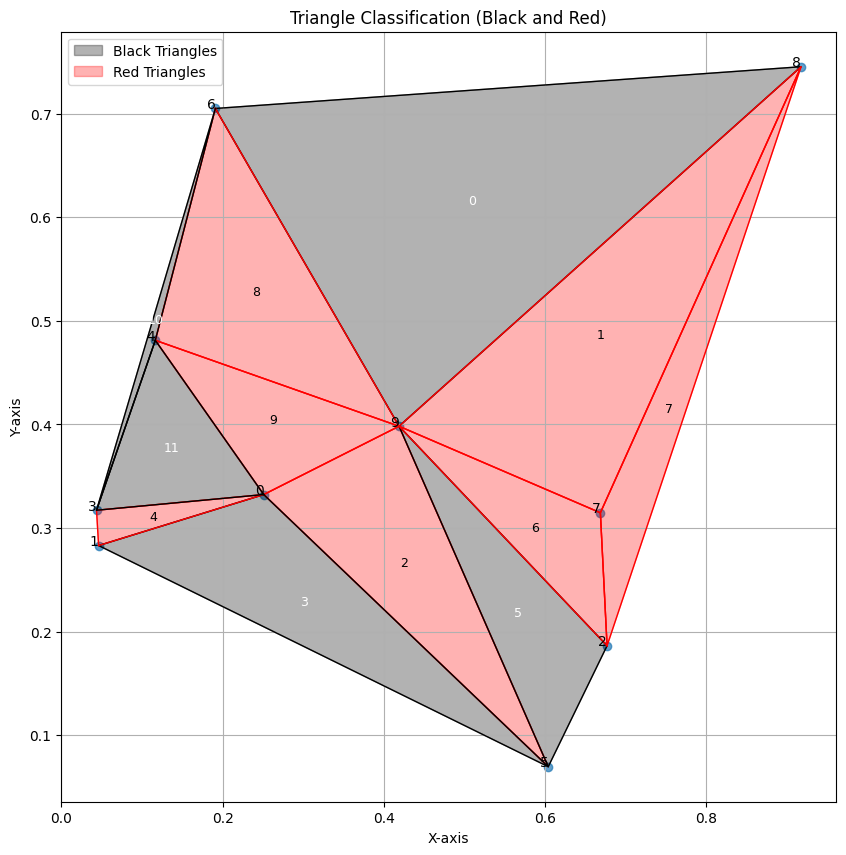

In [ ]:
import dimod
import matplotlib.pyplot as plt
import numpy as np

# Step 10. Solve the QUBO and visualize the result.


def solve_qubo_classical(Q, num_reads=100):
    """Solves the QUBO using a classical simulated annealing sampler."""
    # Create a Binary Quadratic Model (BQM) from the Q matrix
    bqm = dimod.BQM.from_qubo(Q)

    # Use a classical solver (Simulated Annealing)
    sampler = dimod.SimulatedAnnealingSampler()

    # Solve the BQM
    sampleset = sampler.sample(bqm, num_reads=num_reads)

    # Return the best solution found
    # The best solution minimizes the energy, which corresponds to maximizing our objective
    return sampleset.first

def visualize_classified_triangles(x, y, points, triangles, black_triangles_indices, red_triangles_indices):
    """Visualizes the triangles classified as black or red."""
    plt.figure(figsize=(10, 10))

    # Plot the original points and their indices
    plt.scatter(x, y, label='Original Points', alpha=0.7)
    for i in range(len(x)):
        plt.text(x[i], y[i], str(i), fontsize=10, ha='right')

    # Plot triangle edges and fill with color based on classification
    for i, simplex in enumerate(triangles):
        triangle_points = points[simplex]
        # Determine color based on classification
        color = 'black' if i in black_triangles_indices else 'red'
        # Plot the triangle edges
        plt.plot(triangle_points[[0, 1, 2, 0], 0], triangle_points[[0, 1, 2, 0], 1], color=color, linewidth=1.0)
        # Fill the triangle with color
        plt.fill(triangle_points[:, 0], triangle_points[:, 1], color=color, alpha=0.3)

        # Add triangle index to the plot (optional, but helpful for debugging)
        centroid_x, centroid_y = np.mean(triangle_points[:, 0]), np.mean(triangle_points[:, 1])
        plt.text(centroid_x, centroid_y, str(i), fontsize=9, ha='center', va='center', color='white' if color == 'black' else 'black')


    plt.title("Triangle Classification (Black and Red)")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.grid(True)
    # Add a legend to explain the colors
    black_patch = plt.matplotlib.patches.Patch(color='black', alpha=0.3, label='Black Triangles')
    red_patch = plt.matplotlib.patches.Patch(color='red', alpha=0.3, label='Red Triangles')
    plt.legend(handles=[black_patch, red_patch])
    plt.show()


# Main execution for Step 10
if __name__ == '__main__':
    # Ensure 'Q', 'triangle_sizes', 'x', 'y', 'points', 'triangles' are available from previous steps

    # 10.1 Solve the QUBO using the classical solver
    best_solution = solve_qubo_classical(Q, num_reads=100)

    # Print the best solution found
    print("Best solution found:")
    print(best_solution)

    # 10.2 Interpret the solution: which triangles are black (variable value is 1)
    black_triangles_indices = [i for i, value in best_solution.sample.items() if value == 1]
    red_triangles_indices = [i for i, value in best_solution.sample.items() if value == 0]

    print("\nIndices of triangles classified as black:")
    print(black_triangles_indices)

    print("\nIndices of triangles classified as red:")
    print(red_triangles_indices)

    # 10.3 Calculate the total size of the black triangles for this solution
    total_black_size = sum(triangle_sizes[i] for i in black_triangles_indices)
    print(f"\nTotal size of black triangles in the best solution: {total_black_size:.4f}")

    # 10.4 Visualize the solution (Black and Red Triangles)
    visualize_classified_triangles(x, y, points, triangles, black_triangles_indices, red_triangles_indices)

In [ ]:
!pip install dimod

Fixed variables in the BQM: {0: 1, 1: 1, 6: 1, 5: 1, 7: 0, 8: 0, 9: 0, 2: 0}
Best solution found for expanded QUBO with fixed variables (reconstructed):
Sample: {3: np.int8(0), 4: np.int8(0), 10: np.int8(0), 11: np.int8(0), 12: np.int8(0), 13: np.int8(0), 14: np.int8(0), 15: np.int8(0), 16: np.int8(1), 17: np.int8(0), 0: 1, 1: 1, 6: 1, 5: 1, 7: 0, 8: 0, 9: 0, 2: 0}
Energy: 4.81572653704442
Num Occurrences: 1

Indices of triangles classified as black (expanded QUBO solution):
[0, 1, 5, 6]

Indices of triangles classified as red (expanded QUBO solution):
[2, 3, 4, 7, 8, 9, 10, 11]

Total size of black triangles in the best expanded QUBO solution: 0.2187


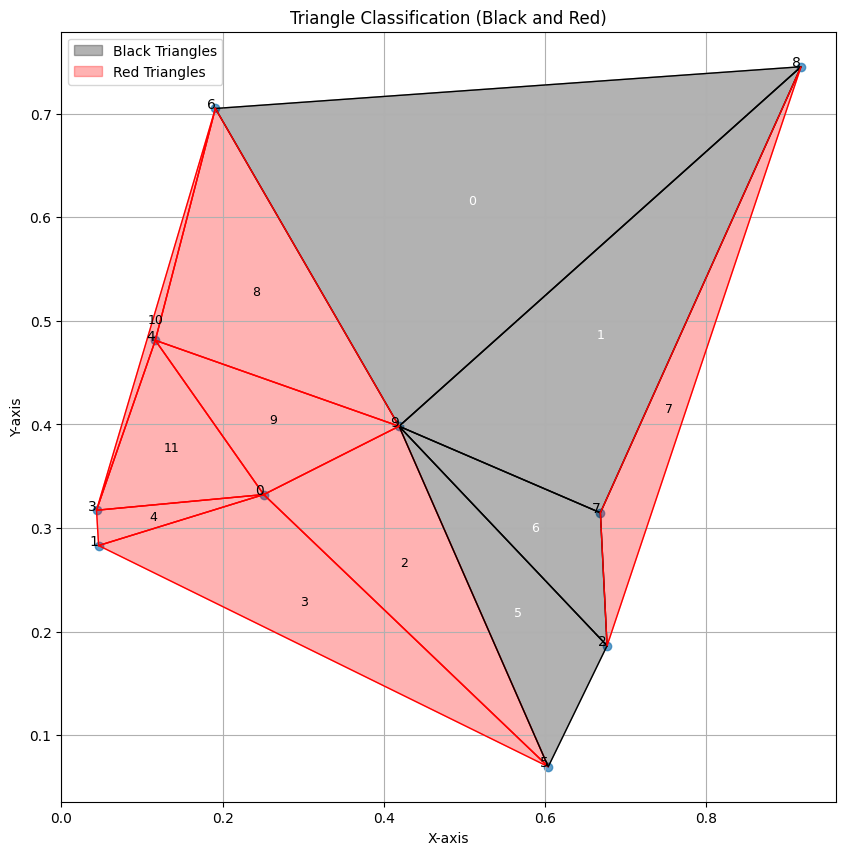

In [ ]:
import dimod
import matplotlib.pyplot as plt
import numpy as np

# Step 11. Solve the QUBO (tuned) and visualize the result.


def solve_qubo_classical(Q, num_reads=100, fixed_variables=None):
    """Solves the QUBO using a classical simulated annealing sampler with optional fixed variables."""
    # Create a Binary Quadratic Model (BQM) from the Q matrix
    bqm = dimod.BQM.from_qubo(Q)

    # Store the original variables before fixing
    original_variables = list(bqm.variables)

    # Fix variables if specified
    if fixed_variables:
        bqm.fix_variables(fixed_variables)
        print(f"Fixed variables in the BQM: {fixed_variables}")


    # Use a classical solver (Simulated Annealing)
    sampler = dimod.SimulatedAnnealingSampler()

    # Solve the BQM
    # The number of reads can be adjusted depending on how many samples you want
    sampleset = sampler.sample(bqm, num_reads=num_reads)

    # Get the best solution found for the unfixed variables
    best_sample_unfixed = sampleset.first.sample
    best_energy = sampleset.first.energy

    # Reconstruct the full solution including fixed variables
    full_solution_sample = dict(best_sample_unfixed)
    if fixed_variables:
        full_solution_sample.update(fixed_variables)

    # Return the full solution and its energy
    # We need to return a SampleView or similar structure that contains the sample and energy
    # Since we modified the sample, let's return a dict and the energy separately,
    # or create a simple object similar to SampleView for clarity.
    # For now, let's return the dictionary and the energy.
    # Returning sampleset.first is preferred if we can reconstruct it.
    # Let's try to reconstruct the sample within a SampleView structure for consistency.

    # Dimod SampleSet.first returns a Sample object (which is a SampleView)
    # We can create a new SampleView from the full sample and the energy.
    # This requires a SampleSet object. Let's simplify and just return the dictionary and energy.

    # A simpler approach is to just return the sample dictionary and energy from the solver.
    # Let's update the function to return the sample dictionary and energy separately.
    # The caller will then handle the interpretation.

    # Let's go back to modifying the original SampleView. This might be tricky.
    # A cleaner approach is to just work with the sample dictionary and energy separately in the main block.

    # Let's adjust the main execution to get the sample dictionary and energy separately.
    # The solve_qubo_classical function will return the sampleset.
    # The main block will extract the best sample dictionary and energy, reconstruct the full sample.

    # Keep the function returning sampleset for now, and handle reconstruction in the main block.
    # The error is in the interpretation loop in the main block.

    return sampleset


# Main execution for Step 11 (originally Step 6 in the user's numbering before re-ordering)
# Ensure 'Q_expanded', 'triangle_sizes', 'x', 'y', 'points', 'triangles', 'total_variables' are available from previous steps

# Define variables to fix
fixed_vars = {0: 1, 1: 1, 6: 1, 5: 1, 7: 0, 8: 0, 9: 0, 2: 0} # Fix triangles 0,1,6,5 black, 7,8,9,2 red

# 11.1 Solve the QUBO using the classical solver with fixed variables
sampleset_expanded = solve_qubo_classical(Q_expanded, num_reads=100, fixed_variables=fixed_vars)

# Get the best solution SampleView
best_solution_expanded = sampleset_expanded.first

# Reconstruct the full solution sample dictionary including fixed variables
full_solution_sample_dict = dict(best_solution_expanded.sample)
if fixed_vars:
    # Add the fixed variables to the sample dictionary
    full_solution_sample_dict.update(fixed_vars)

# Print the best solution found (reconstructed full sample and energy)
print("Best solution found for expanded QUBO with fixed variables (reconstructed):")
print(f"Sample: {full_solution_sample_dict}")
print(f"Energy: {best_solution_expanded.energy}")
print(f"Num Occurrences: {best_solution_expanded.num_occurrences}")


# 11.2 Interpret the solution: which triangles are black (variable value is 1)
# We only care about the original triangle variables (indices 0 to num_triangles - 1)
# Use the reconstructed full_solution_sample_dict
original_triangle_solution = {i: full_solution_sample_dict[i] for i in range(num_triangles)}

black_triangles_indices = [i for i, value in original_triangle_solution.items() if value == 1]
red_triangles_indices = [i for i, value in original_triangle_solution.items() if value == 0]

print("\nIndices of triangles classified as black (expanded QUBO solution):")
print(black_triangles_indices)

print("\nIndices of triangles classified as red (expanded QUBO solution):")
print(red_triangles_indices)

# 11.3 Calculate the total size of the black triangles for this solution
total_black_size_expanded = sum(triangle_sizes[i] for i in black_triangles_indices)
print(f"\nTotal size of black triangles in the best expanded QUBO solution: {total_black_size_expanded:.4f}")

# 11.4 Visualize the solution (Black and Red Triangles)
visualize_classified_triangles(x, y, points, triangles, black_triangles_indices, red_triangles_indices)

In [ ]:
!pip install qiskit qiskit-optimization qiskit-algorithms qiskit-aer
!pip install qiskit-ibm-runtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.3/364.3 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 8.6 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Uninstalling requests-2.32.3:
      Successfully uninstalled requests-2.32.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.3, but you have requests 2.32.4 which is incompatible.


In [ ]:
!pip uninstall -y qiskit
!pip install -q "qiskit-terra==0.25.2" "qiskit-algorithms==0.2.1" "qiskit-optimization==0.5.0"


Found existing installation: qiskit 2.1.1
Uninstalling qiskit-2.1.1:
  Successfully uninstalled qiskit-2.1.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.9/306.9 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 21.4 MB/s eta 0:00:00


In [ ]:
#################################
#
# Step 10. D-Wave quantum solution.
#
#################################

import dimod
# Import DWaveSampler and EmbeddingComposite if using D-Wave hardware/cloud solvers
# from dwave.system import DWaveSampler, EmbeddingComposite
from google.colab import userdata # To access D-Wave API token from secrets

# Ensure Q_expanded, total_variables, num_triangles, triangle_sizes,
# x, y, points, and triangles are available from previous steps.
# The visualization function visualize_classified_triangles should also be available (defined in cell IihwFY4q3iji).


# Use the expanded QUBO matrix Q_expanded which includes all penalties
# Our QUBO problem is represented by Q_expanded, not a toy example.

# Create a Binary Quadratic Model (BQM) from the Q_expanded matrix
# dimod works directly with BQM objects, which represent QUBOs or Ising problems.
bqm = dimod.BQM.from_qubo(Q_expanded)

print("Binary Quadratic Model (BQM) created from Q_expanded:")
print(bqm)
print(f"Number of variables in BQM: {bqm.num_variables}")


# --- Solve the BQM using a D-Wave Sampler ---
# This requires a D-Wave API token and access to a sampler.
# We will use a classical sampler provided by dimod for demonstration if no D-Wave token is found.
# If you have a D-Wave token, you can use a D-Wave cloud solver.

try:
    # Access the D-Wave API token from Colab secrets
    dwave_token = userdata.get('DWAVE_API_TOKEN')

    if dwave_token is None:
        print("\nD-Wave API token not found in Colab secrets. Using a classical sampler instead.")
        # Use a classical sampler provided by dimod if no D-Wave token
        sampler = dimod.SimulatedAnnealingSampler()
        print("Using dimod.SimulatedAnnealingSampler.")
        # Note: For consistency with the previous simulated annealing run,
        # you might want to adjust the parameters (num_reads, sweeps, etc.)
        # However, for a basic run, default parameters are often sufficient.
        num_reads = 100 # Number of samples to request

    else:
        print("\nD-Wave API token found. Attempting to use a D-Wave cloud solver.")
        # Use a D-Wave cloud solver (e.g., a quantum annealer or a hybrid solver)
        # You need to install dwave-system: !pip install dwave-system
        # This requires dwave.system
        from dwave.system import DWaveSampler, EmbeddingComposite

        # Select a D-Wave solver.
        # You might need to specify region or solver features depending on your problem size and account.
        # Find available solvers: print(DWaveSampler().solvers(capabilities=...))
        # For a problem size of total_variables, choose a solver with enough qubits and connectivity.
        # For total_variables ~ 18, a smaller Advantage or Advantage2_prototype system might work directly
        # or require embedding (using EmbeddingComposite).
        # Let's try a generic sampler first and let EmbeddingComposite handle it if needed.
        # You might need to specify a specific solver name if default doesn't work or you want a particular one.
        # sampler = DWaveSampler(token=dwave_token) # Connects to a default solver

        # Using EmbeddingComposite is generally recommended for arbitrary BQMs
        # as it handles embedding the problem onto the solver's graph.
        try:
            # Attempt to connect to a D-Wave sampler via EmbeddingComposite
            sampler = EmbeddingComposite(DWaveSampler(token=dwave_token))
            print(f"Using D-Wave solver: {sampler.child.solver.name}")
            num_reads = 100 # Number of samples to request from D-Wave

        except Exception as dwave_connect_error:
             print(f"\nError connecting to D-Wave sampler: {dwave_connect_error}")
             print("Falling back to dimod.SimulatedAnnealingSampler.")
             # Fallback to classical sampler if D-Wave connection fails
             sampler = dimod.SimulatedAnnealingSampler()
             num_reads = 100


    print(f"Solving BQM with {sampler. biodiversifier.name} using {num_reads} reads...")

    # Run the sampler on the BQM
    # The result is a SampleSet
    sampleset = sampler.sample(bqm, num_reads=num_reads)

    print("\nSampler results (first 5):")
    print(sampleset.head(5)) # Display the first few samples

    # Get the best sample (lowest energy)
    best_sample_dwave = sampleset.first.sample # Get the dictionary of variable assignments
    best_energy_dwave = sampleset.first.energy # Get the energy of the best sample

    print("\nBest sample found by D-Wave Sampler (lowest energy):")
    print(best_sample_dwave)
    print(f"Energy: {best_energy_dwave}")


    # Interpret the solution for the original triangle variables (indices 0 to num_triangles - 1)
    # The sample dictionary has keys corresponding to the variable indices (0 to total_variables - 1)
    # We only care about the first num_triangles variables for triangle classification.

    # Ensure num_triangles is available
    if 'num_triangles' in globals():
        original_triangle_solution_dwave = {i: best_sample_dwave[i] for i in range(num_triangles)}

        black_triangles_dwave = [i for i, value in original_triangle_solution_dwave.items() if value == 1]
        red_triangles_dwave = [i for i, value in original_triangle_solution_dwave.items() if value == 0]

        print("\nIndices of triangles classified as black (D-Wave Sampler Solution):")
        print(black_triangles_dwave)

        print("\nIndices of triangles classified as red (D-Wave Sampler Solution):")
        print(red_triangles_dwave)

        # Calculate and print the total size of the black triangles for this solution
        # Ensure triangle_sizes is available
        if 'triangle_sizes' in globals():
            total_black_size_dwave = sum(triangle_sizes[i] for i in black_triangles_dwave)
            print(f"\nTotal size of black triangles in the best D-Wave sampler solution: {total_black_size_dwave:.4f}")

            # Visualize the results
            # Ensure visualize_classified_triangles function is available
            if 'visualize_classified_triangles' in globals():
                print("\nVisualizing D-Wave Sampler Solution...")
                visualize_classified_triangles(x, y, points, triangles, black_triangles_dwave, red_triangles_dwave)
            else:
                print("\nVisualization function 'visualize_classified_triangles' not found. Cannot visualize results.")

        else:
             print("\nCould not calculate total black size: 'triangle_sizes' is not defined.")

    else:
         print("\nCould not interpret solution for original triangles: 'num_triangles' is not defined.")


except ValueError as ve:
    print(f"\nConfiguration Error: {ve}")
    print("Please ensure you have a D-Wave API token configured in Colab secrets with the name 'DWAVE_API_TOKEN'.")
except ImportError as ie:
     print(f"\nImport Error: {ie}")
     print("This error occurs because the necessary D-Wave libraries (dwave-system) are not installed.")
     print("Please run the installation cell for D-Wave libraries (!pip install dimod dwave-system dwave-ocean-sdk) first.")
except Exception as e:
    print(f"\nAn unexpected error occurred while trying to use the D-Wave sampler: {e}")
    print("Please check your D-Wave account, token, and solver access.")

Binary Quadratic Model (BQM) created from Q_expanded:
BinaryQuadraticModel({0: 0.0, 1: -0.06416613819166926, 2: -0.03369003617805564, 3: 0.0, 4: 0.0, 5: 0.0, 6: -0.015685665786590745, 7: 0.0, 8: -0.036926176076933326, 9: -0.016932986817562883, 10: 0.0, 11: -0.01646467050041052, 12: 3.0, 13: 3.0, 14: 3.0, 15: 3.0, 16: 3.0, 17: 3.0}, {(1, 0): 0.24436017470544988, (3, 2): -0.03559516619225973, (4, 2): 1.0, (4, 3): 0.03914975011507331, (5, 1): 0.17392149117452818, (5, 2): 0.09017467975170611, (6, 0): 0.26342712821740427, (6, 1): 1.15970360795652, (6, 2): 1.0987514039292927, (6, 5): 0.05416593896877632, (7, 1): 0.14610018068636543, (7, 6): 0.0491392358762084, (8, 0): 0.18988025047597804, (8, 1): 1.0, (8, 2): 0.14123242450997792, (9, 0): 0.26592177027934855, (9, 2): 0.10124604599123704, (9, 4): 0.04097514148075292, (9, 5): 0.07945518842631542, (9, 6): 0.06523730520830726, (9, 8): 0.10771832578899242, (10, 8): -0.0020523452947072036, (11, 3): 1.0, (11, 4): 0.03648392492363462, (11, 8): 1.0, (

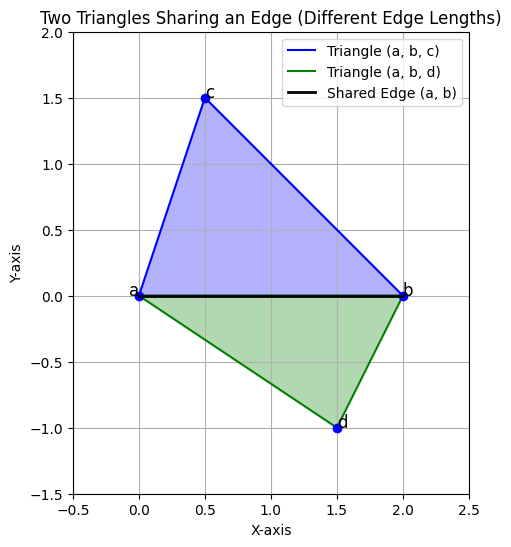

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the vertices of the two triangles
# Triangle 1: (a, b, c)
# Triangle 2: (a, b, d)
# Shared edge: (a, b)

# Define the coordinates of the vertices to create triangles with different edge lengths
a = np.array([0, 0])
b = np.array([2, 0]) # Changed x-coordinate of b
c = np.array([0.5, 1.5]) # Changed coordinates of c
d = np.array([1.5, -1.0]) # Changed coordinates of d

# Create a figure and axes
plt.figure(figsize=(6, 6))
ax = plt.gca()

# Plot the triangles
# Triangle (a, b, c)
triangle1_vertices = np.vstack([a, b, c, a]) # Close the triangle loop
ax.plot(triangle1_vertices[:, 0], triangle1_vertices[:, 1], 'b-', label='Triangle (a, b, c)')
ax.fill(triangle1_vertices[:, 0], triangle1_vertices[:, 1], 'b', alpha=0.3)

# Triangle (a, b, d)
triangle2_vertices = np.vstack([a, b, d, a]) # Close the triangle loop
ax.plot(triangle2_vertices[:, 0], triangle2_vertices[:, 1], 'g-', label='Triangle (a, b, d)')
ax.fill(triangle2_vertices[:, 0], triangle2_vertices[:, 1], 'g', alpha=0.3)

# Plot the vertices with labels
ax.plot(*a, 'bo')
ax.text(a[0], a[1], 'a', fontsize=12, ha='right')
ax.plot(*b, 'bo')
ax.text(b[0], b[1], 'b', fontsize=12, ha='left')
ax.plot(*c, 'bo')
ax.text(c[0], c[1], 'c', fontsize=12, ha='left')
ax.plot(*d, 'bo')
ax.text(d[0], d[1], 'd', fontsize=12, ha='left')


# Highlight the shared edge (a, b)
ax.plot([a[0], b[0]], [a[1], b[1]], 'k-', linewidth=2, label='Shared Edge (a, b)')


# Set plot limits and labels
ax.set_xlim([-0.5, 2.5]) # Adjusted x-limits
ax.set_ylim([-1.5, 2.0]) # Adjusted y-limits
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_title("Two Triangles Sharing an Edge (Different Edge Lengths)")
ax.set_aspect('equal', adjustable='box') # Equal scaling for x and y axes
ax.grid(True)
ax.legend()

# Show the plot
plt.show()

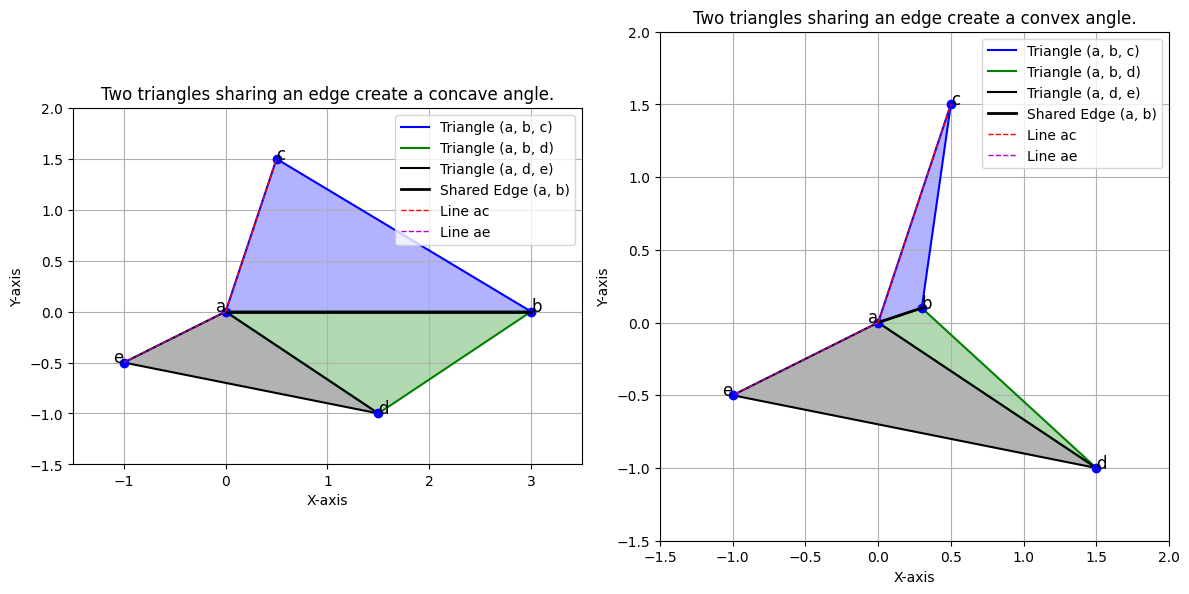


For Figure 1:
Angle cae: 135.00 degrees
Condition <cae > 180 degrees is NOT satisfied for Figure 1.

For Figure 2 (b closer to a):
Angle abc: 116.57 degrees
Angle abd: 119.05 degrees
Sum of angles (<abc + <abd): 235.62 degrees
Angle cae: 135.00 degrees
Condition <cae > 180 degrees is NOT satisfied for Figure 2.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the vertices for the first figure
a_fig1 = np.array([0, 0])
b_fig1 = np.array([3, 0])
c_fig1 = np.array([0.5, 1.5])
d_fig1 = np.array([1.5, -1.0])
e_fig1 = np.array([-1, -0.5])

# Define the vertices for the second figure
a_fig2 = np.array([0, 0])
b_fig2 = np.array([0.3, 0.1])
c_fig2 = np.array([0.5, 1.5])
d_fig2 = np.array([1.5, -1.0])
e_fig2 = np.array([-1, -0.5])

# Create a figure with two subplots side-by-side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) # 1 row, 2 columns

# --- Plotting for Figure 1 (Left Subplot) ---
# Plot the triangles for Figure 1
triangle1_vertices_fig1 = np.vstack([a_fig1, b_fig1, c_fig1, a_fig1])
ax1.plot(triangle1_vertices_fig1[:, 0], triangle1_vertices_fig1[:, 1], 'b-', label='Triangle (a, b, c)')
ax1.fill(triangle1_vertices_fig1[:, 0], triangle1_vertices_fig1[:, 1], 'b', alpha=0.3)

triangle2_vertices_fig1 = np.vstack([a_fig1, b_fig1, d_fig1, a_fig1])
ax1.plot(triangle2_vertices_fig1[:, 0], triangle2_vertices_fig1[:, 1], 'g-', label='Triangle (a, b, d)')
ax1.fill(triangle2_vertices_fig1[:, 0], triangle2_vertices_fig1[:, 1], 'g', alpha=0.3)

triangle3_vertices_fig1 = np.vstack([a_fig1, d_fig1, e_fig1, a_fig1])
ax1.plot(triangle3_vertices_fig1[:, 0], triangle3_vertices_fig1[:, 1], 'k-', label='Triangle (a, d, e)')
ax1.fill(triangle3_vertices_fig1[:, 0], triangle3_vertices_fig1[:, 1], 'black', alpha=0.3)

# Plot vertices and labels for Figure 1
ax1.plot(*a_fig1, 'bo')
ax1.text(a_fig1[0], a_fig1[1], 'a', fontsize=12, ha='right')
ax1.plot(*b_fig1, 'bo')
ax1.text(b_fig1[0], b_fig1[1], 'b', fontsize=12, ha='left')
ax1.plot(*c_fig1, 'bo')
ax1.text(c_fig1[0], c_fig1[1], 'c', fontsize=12, ha='left')
ax1.plot(*d_fig1, 'bo')
ax1.text(d_fig1[0], d_fig1[1], 'd', fontsize=12, ha='left')
ax1.plot(*e_fig1, 'bo')
ax1.text(e_fig1[0], e_fig1[1], 'e', fontsize=12, ha='right')

# Highlight the shared edge (a, b) for Figure 1
ax1.plot([a_fig1[0], b_fig1[0]], [a_fig1[1], b_fig1[1]], 'k-', linewidth=2, label='Shared Edge (a, b)')

# Optionally, plot lines from a to c and a to e to visualize the angle <cae
ax1.plot([a_fig1[0], c_fig1[0]], [a_fig1[1], c_fig1[1]], 'r--', linewidth=1, label='Line ac')
ax1.plot([a_fig1[0], e_fig1[0]], [a_fig1[1], e_fig1[1]], 'm--', linewidth=1, label='Line ae')


# Set plot limits and labels for Figure 1
ax1.set_xlim([-1.5, 3.5])
ax1.set_ylim([-1.5, 2.0])
ax1.set_xlabel("X-axis")
ax1.set_ylabel("Y-axis")
ax1.set_title("Two triangles sharing an edge create a concave angle.")
ax1.set_aspect('equal', adjustable='box')
ax1.grid(True)
ax1.legend()


# --- Plotting for Figure 2 (Right Subplot) ---
# Plot the triangles for Figure 2
triangle1_vertices_fig2 = np.vstack([a_fig2, b_fig2, c_fig2, a_fig2])
ax2.plot(triangle1_vertices_fig2[:, 0], triangle1_vertices_fig2[:, 1], 'b-', label='Triangle (a, b, c)')
ax2.fill(triangle1_vertices_fig2[:, 0], triangle1_vertices_fig2[:, 1], 'b', alpha=0.3)

triangle2_vertices_fig2 = np.vstack([a_fig2, b_fig2, d_fig2, a_fig2])
ax2.plot(triangle2_vertices_fig2[:, 0], triangle2_vertices_fig2[:, 1], 'g-', label='Triangle (a, b, d)')
ax2.fill(triangle2_vertices_fig2[:, 0], triangle2_vertices_fig2[:, 1], 'g', alpha=0.3)

triangle3_vertices_fig2 = np.vstack([a_fig2, d_fig2, e_fig2, a_fig2])
ax2.plot(triangle3_vertices_fig2[:, 0], triangle3_vertices_fig2[:, 1], 'k-', label='Triangle (a, d, e)')
ax2.fill(triangle3_vertices_fig2[:, 0], triangle3_vertices_fig2[:, 1], 'black', alpha=0.3)

# Plot vertices and labels for Figure 2
ax2.plot(*a_fig2, 'bo')
ax2.text(a_fig2[0], a_fig2[1], 'a', fontsize=12, ha='right')
ax2.plot(*b_fig2, 'bo')
ax2.text(b_fig2[0], b_fig2[1], 'b', fontsize=12, ha='left')
ax2.plot(*c_fig2, 'bo')
ax2.text(c_fig2[0], c_fig2[1], 'c', fontsize=12, ha='left')
ax2.plot(*d_fig2, 'bo')
ax2.text(d_fig2[0], d_fig2[1], 'd', fontsize=12, ha='left')
ax2.plot(*e_fig2, 'bo')
ax2.text(e_fig2[0], e_fig2[1], 'e', fontsize=12, ha='right')

# Highlight shared edge for Figure 2
ax2.plot([a_fig2[0], b_fig2[0]], [a_fig2[1], b_fig2[1]], 'k-', linewidth=2, label='Shared Edge (a, b)')

# Optionally, plot lines from a to c and a to e to visualize the angle <cae
ax2.plot([a_fig2[0], c_fig2[0]], [a_fig2[1], c_fig2[1]], 'r--', linewidth=1, label='Line ac')
ax2.plot([a_fig2[0], e_fig2[0]], [a_fig2[1], e_fig2[1]], 'm--', linewidth=1, label='Line ae')

# Set plot limits and labels for Figure 2
ax2.set_xlim([-1.5, 2.0])
ax2.set_ylim([-1.5, 2.0])
ax2.set_xlabel("X-axis")
ax2.set_ylabel("Y-axis")
ax2.set_title("Two triangles sharing an edge create a convex angle.")
ax2.set_aspect('equal', adjustable='box')
ax2.grid(True)
ax2.legend()

# Adjust layout to prevent titles/labels overlapping
plt.tight_layout()

# Display the figures
plt.show()


# You can also calculate the angles to verify the condition
def calculate_angle(p_a, p_b, p_c):
    """
    Calculates the angle (in degrees) at point p_b between vectors p_b->p_a and p_b->p_c.
    """
    vec_ba = p_a - p_b
    vec_bc = p_c - p_b
    dot_product = np.dot(vec_ba, vec_bc)
    norm_ba = np.linalg.norm(vec_ba)
    norm_bc = np.linalg.norm(vec_bc)
    if norm_ba == 0 or norm_bc == 0:
        return 0 # Avoid division by zero
    cosine_angle = dot_product / (norm_ba * norm_bc)
    cosine_angle = np.clip(cosine_angle, -1.0, 1.0) # Clamp for numerical stability
    angle_in_radians = np.arccos(cosine_angle)
    angle_in_degrees = np.degrees(angle_in_radians)
    return angle_in_degrees

# Calculate angle <cae for Figure 1 (angle at a between vectors ac and ae)
angle_cae_fig1 = calculate_angle(c_fig1, a_fig1, e_fig1)
print(f"\nFor Figure 1:")
print(f"Angle cae: {angle_cae_fig1:.2f} degrees")
if angle_cae_fig1 > 180:
    print("Condition <cae > 180 degrees is satisfied for Figure 1.")
else:
    print("Condition <cae > 180 degrees is NOT satisfied for Figure 1.")


# Calculate angle <cae for Figure 2 (angle at a between vectors ac and ae)
angle_cae_fig2 = calculate_angle(c_fig2, a_fig2, e_fig2)
print(f"\nFor Figure 2 (b closer to a):")
print(f"Angle abc: {calculate_angle(a_fig2, b_fig2, c_fig2):.2f} degrees") # Re-calculate abc for completeness
print(f"Angle abd: {calculate_angle(a_fig2, b_fig2, d_fig2):.2f} degrees") # Re-calculate abd for completeness
print(f"Sum of angles (<abc + <abd): {calculate_angle(a_fig2, b_fig2, c_fig2) + calculate_angle(a_fig2, b_fig2, d_fig2):.2f} degrees")
print(f"Angle cae: {angle_cae_fig2:.2f} degrees")

if angle_cae_fig2 > 180:
    print("Condition <cae > 180 degrees is satisfied for Figure 2.")
else:
    print("Condition <cae > 180 degrees is NOT satisfied for Figure 2.")

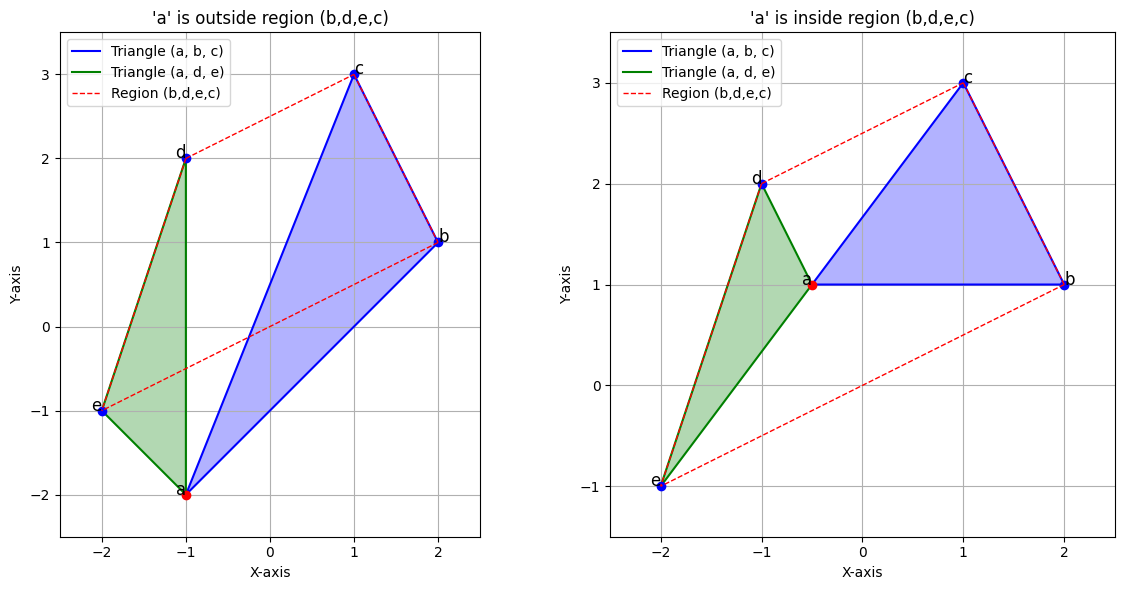

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import ConvexHull # Import ConvexHull to help visualize the region

# Define the coordinates for points b, c, d, and e (same for both figures)
b = np.array([2, 1])
c = np.array([1, 3])
d = np.array([-1, 2])
e = np.array([-2, -1])

# Create a figure with two subplots side-by-side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) # 1 row, 2 columns

# --- Plotting for Figure 1 (Left Subplot) ---
# Define the position of point 'a' for the first figure (outside the region b,d,e,c)
a_fig1 = np.array([-1, -2]) # Moved point 'a' further outside the region

# Plot the triangles for Figure 1
triangle1_vertices_fig1 = np.vstack([a_fig1, b, c, a_fig1]) # Triangle (a, b, c)
ax1.plot(triangle1_vertices_fig1[:, 0], triangle1_vertices_fig1[:, 1], 'b-', label='Triangle (a, b, c)')
ax1.fill(triangle1_vertices_fig1[:, 0], triangle1_vertices_fig1[:, 1], 'b', alpha=0.3)

triangle2_vertices_fig1 = np.vstack([a_fig1, d, e, a_fig1]) # Triangle (a, d, e)
ax1.plot(triangle2_vertices_fig1[:, 0], triangle2_vertices_fig1[:, 1], 'g-', label='Triangle (a, d, e)')
ax1.fill(triangle2_vertices_fig1[:, 0], triangle2_vertices_fig1[:, 1], 'g', alpha=0.3)

# Plot the shared vertex 'a' and other vertices with labels for Figure 1
ax1.plot(*a_fig1, 'ro') # 'a' in red
ax1.text(a_fig1[0], a_fig1[1], 'a', fontsize=12, ha='right')
ax1.plot(*b, 'bo')
ax1.text(b[0], b[1], 'b', fontsize=12, ha='left')
ax1.plot(*c, 'bo')
ax1.text(c[0], c[1], 'c', fontsize=12, ha='left')
ax1.plot(*d, 'bo')
ax1.text(d[0], d[1], 'd', fontsize=12, ha='right')
ax1.plot(*e, 'bo')
ax1.text(e[0], e[1], 'e', fontsize=12, ha='right')

# Optionally, plot the convex hull of b, c, d, e to visualize the region
points_bcde = np.vstack([b, c, d, e])
try:
    hull_bcde = ConvexHull(points_bcde)
    for simplex in hull_bcde.simplices:
        ax1.plot(points_bcde[simplex, 0], points_bcde[simplex, 1], 'r--', linewidth=1, label='Region (b,d,e,c)' if simplex[0] == hull_bcde.simplices[0,0] else "")
except:
    # Handle cases where the points might be collinear or degenerate
    ax1.plot(points_bcde[[0, 1, 2, 3, 0], 0], points_bcde[[0, 1, 2, 3, 0], 1], 'r--', linewidth=1, label='Region (b,d,e,c)')


# Set plot limits and labels for Figure 1
ax1.set_xlim([-2.5, 2.5])
ax1.set_ylim([-2.5, 3.5]) # Adjusted y-limits to include the new position of a
ax1.set_xlabel("X-axis")
ax1.set_ylabel("Y-axis")
ax1.set_title("'a' is outside region (b,d,e,c)")
ax1.set_aspect('equal', adjustable='box')
ax1.grid(True)
ax1.legend()


# --- Plotting for Figure 2 (Right Subplot) ---
# Define the position of point 'a' for the second figure (inside the region b,d,e,c)
a_fig2 = np.array([-0.5, 1.0]) # Point 'a' inside the region

# Plot the triangles for Figure 2
triangle1_vertices_fig2 = np.vstack([a_fig2, b, c, a_fig2]) # Triangle (a, b, c)
ax2.plot(triangle1_vertices_fig2[:, 0], triangle1_vertices_fig2[:, 1], 'b-', label='Triangle (a, b, c)')
ax2.fill(triangle1_vertices_fig2[:, 0], triangle1_vertices_fig2[:, 1], 'b', alpha=0.3)

triangle2_vertices_fig2 = np.vstack([a_fig2, d, e, a_fig2]) # Triangle (a, d, e)
ax2.plot(triangle2_vertices_fig2[:, 0], triangle2_vertices_fig2[:, 1], 'g-', label='Triangle (a, d, e)')
ax2.fill(triangle2_vertices_fig2[:, 0], triangle2_vertices_fig2[:, 1], 'g', alpha=0.3)

# Plot the shared vertex 'a' and other vertices with labels for Figure 2
ax2.plot(*a_fig2, 'ro') # 'a' in red
ax2.text(a_fig2[0], a_fig2[1], 'a', fontsize=12, ha='right')
ax2.plot(*b, 'bo')
ax2.text(b[0], b[1], 'b', fontsize=12, ha='left')
ax2.plot(*c, 'bo')
ax2.text(c[0], c[1], 'c', fontsize=12, ha='left')
ax2.plot(*d, 'bo')
ax2.text(d[0], d[1], 'd', fontsize=12, ha='right')
ax2.plot(*e, 'bo')
ax2.text(e[0], e[1], 'e', fontsize=12, ha='right')

# Optionally, plot the convex hull of b, c, d, e to visualize the region
try:
    hull_bcde = ConvexHull(points_bcde)
    for simplex in hull_bcde.simplices:
        ax2.plot(points_bcde[simplex, 0], points_bcde[simplex, 1], 'r--', linewidth=1, label='Region (b,d,e,c)' if simplex[0] == hull_bcde.simplices[0,0] else "")
except:
    # Handle cases where the points might be collinear or degenerate
     ax2.plot(points_bcde[[0, 1, 2, 3, 0], 0], points_bcde[[0, 1, 2, 3, 0], 1], 'r--', linewidth=1, label='Region (b,d,e,c)')


# Set plot limits and labels for Figure 2
ax2.set_xlim([-2.5, 2.5])
ax2.set_ylim([-1.5, 3.5])
ax2.set_xlabel("X-axis")
ax2.set_ylabel("Y-axis")
ax2.set_title("'a' is inside region (b,d,e,c)")
ax2.set_aspect('equal', adjustable='box')
ax2.grid(True)
ax2.legend()


# Adjust layout to prevent titles/labels overlapping
plt.tight_layout()

# Display the figures
plt.show()